In [1]:
from scipy import stats
from numpy import log
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-6-27'

In [2]:
os.chdir(os.getcwd() + '\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> 04-caso_full_2020-05-23.csv
5 -> 05-caso_full_2020-06-05.csv
6 -> 06-caso_full_2020-06-26.csv
7 -> artigo
8 -> cities.csv
9 -> covid19_municipios.csv
10 -> COVID19_REGIOES BR.csv
11 -> Dados_demográficos_municípios.xlsx
12 -> Dados_demográficos_municípios_new.xlsx
13 -> Datalab_COVID.pptx
14 -> Data_set_socioeconomic_characteristics.csv
15 -> figures
16 -> health_charateristics (2).csv
17 -> idade.xlsx
18 -> obito_cartorio.csv
19 -> População residente municipal x população faixa etária.csv
20 -> População residente por estado - 2015.csv
21 -> População residente x sexo.csv
22 -> results


In [3]:
# 06-caso_full_2020-06-26.csv
date = 6
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
263563,NaN,43.0,2020-06-25,26,11377239.0,True,False,23060,202.68538,2020-06-25,0.0217,500,108,state,RS,1051,0
263564,NaN,42.0,2020-06-25,26,7164788.0,True,False,21951,306.37334,2020-06-25,0.0132,289,106,state,SC,1030,10
263565,NaN,28.0,2020-06-25,26,2298696.0,True,False,21081,917.08516,2020-06-25,0.0263,554,104,state,SE,728,30
263566,NaN,35.0,2020-06-25,26,45919049.0,True,False,248587,541.35921,2020-06-25,0.0553,13759,122,state,SP,9765,407
263567,NaN,17.0,2020-06-25,26,1572866.0,False,True,9425,599.22460,2020-06-24,0.0194,183,100,state,TO,0,0


In [4]:
# df_cov = df_cov[
#         (df_cov['date'] == df_cov['date'].tail(1).values[0]) & 
#         (df_cov['place_type'] == 'city') & 
#         (df_cov['last_available_confirmed'] > 1)
# ][[
#     "city",
#     "state",
#     "estimated_population_2019",
#     "last_available_confirmed",
#     "last_available_deaths",
#     "last_available_confirmed_per_100k_inhabitants",
#     "last_available_death_rate",
# ]]
# df_cov = df_cov.rename(columns={
#     "city": "City",
#     "state": "State",
#     "estimated_population_2019": "Population",
#     "last_available_confirmed": "Confirmed",
#     "last_available_deaths": "Deaths",
#     "last_available_confirmed_per_100k_inhabitants": "Confirmed-100k",
#     "last_available_death_rate": "Death Rate",
# })
# df_cov.head()
# df = df_cov
# df.head()

In [5]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263568 entries, 0 to 263567
Data columns (total 17 columns):
city                                             260729 non-null object
city_ibge_code                                   262057 non-null float64
date                                             263568 non-null object
epidemiological_week                             263568 non-null int64
estimated_population_2019                        262057 non-null float64
is_last                                          263568 non-null bool
is_repeated                                      263568 non-null bool
last_available_confirmed                         263568 non-null int64
last_available_confirmed_per_100k_inhabitants    255741 non-null float64
last_available_date                              263568 non-null object
last_available_death_rate                        263568 non-null float64
last_available_deaths                            263568 non-null int64
order_for_place             

In [6]:
teste = 'date'
df_cov = df_cov[['last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate', teste]]
df_cov[teste] = pd.to_datetime(df_cov[teste])
group = df_cov.groupby(teste)
df = pd.DataFrame()
df['Confirmed'] = group.sum()['last_available_confirmed']/2
df['Deaths'] = group.sum()['last_available_deaths']/2
df['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']/2
df['Death/100k'] = group.sum()['last_available_death_rate']/2
df.index.name = 'Date'
df.head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-02-25,1.0,0.0,0.00517,0.0
2020-02-26,1.0,0.0,0.00517,0.0
2020-02-27,1.0,0.0,0.00517,0.0
2020-02-28,2.0,0.0,0.01034,0.0
2020-02-29,2.0,0.0,0.01034,0.0


In [7]:
df.tail()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-06-21,1088216.0,50709.0,854488.428065,98.61535
2020-06-22,1114395.0,51435.0,878269.344835,97.87290
2020-06-23,1152251.5,52819.0,913090.974635,98.42475
2020-06-24,1191275.0,53867.5,946604.071765,97.91435
2020-06-25,1225993.0,54918.5,973543.080135,96.63045


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-02-25 to 2020-06-25
Data columns (total 4 columns):
Confirmed         122 non-null float64
Deaths            122 non-null float64
Confirmed/100k    122 non-null float64
Death/100k        122 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df[df['Confirmed'] >= 100].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-14,134.0,0.0,41.104555,0.00000
2020-03-15,153.0,0.0,43.039390,0.00000
2020-03-16,276.0,0.0,46.888555,0.00000
2020-03-17,323.0,1.0,54.310990,0.00625
2020-03-18,509.5,3.0,68.983255,0.01325


In [10]:
df[df['Confirmed'] >= 1_000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-21,1101.5,15.0,161.589555,0.76290
2020-03-22,1432.0,18.5,179.500525,0.75685
2020-03-23,1748.0,23.5,240.891625,0.76245
2020-03-24,2018.5,31.5,301.893030,1.02365
2020-03-25,2565.5,59.0,385.438370,1.83135


In [11]:
df[df['Confirmed'] >= 10_000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-04-04,10361.5,444.0,1839.616505,17.20725
2020-04-05,11422.5,496.0,2102.456695,19.36315
2020-04-06,12261.5,569.5,2443.711145,22.62515
2020-04-07,14082.5,691.0,2970.992270,24.60300
2020-04-08,16255.5,826.0,3364.325070,29.48010


In [12]:
df[df['Confirmed'] >= 100_000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-05-03,101816.0,7073.0,35124.271240,96.15070
2020-05-04,108777.0,7381.0,38446.534915,97.45235
2020-05-05,116412.0,7972.0,42866.960620,102.06045
2020-05-06,126628.0,8566.5,47223.593100,101.38340
2020-05-07,136648.0,9270.5,53123.150495,102.50370


In [13]:
df[df['Confirmed'] >= 1_000_000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-06-19,1039339.5,49099.0,803821.459225,100.01535
2020-06-20,1071616.0,50100.0,839065.530380,99.71140
2020-06-21,1088216.0,50709.0,854488.428065,98.61535
2020-06-22,1114395.0,51435.0,878269.344835,97.87290
2020-06-23,1152251.5,52819.0,913090.974635,98.42475


In [14]:
df.iloc[:30]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-02-25,1.0,0.0,0.005170,0.00000
2020-02-26,1.0,0.0,0.005170,0.00000
2020-02-27,1.0,0.0,0.005170,0.00000
2020-02-28,2.0,0.0,0.010340,0.00000
2020-02-29,2.0,0.0,0.010340,0.00000
2020-03-01,2.0,0.0,0.010340,0.00000
2020-03-02,2.0,0.0,0.010340,0.00000
2020-03-03,2.0,0.0,0.010340,0.00000
2020-03-04,3.0,0.0,0.015510,0.00000


In [15]:
df.iloc[30:60]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-26,2987.5,77.0,454.683035,3.20045
2020-03-27,3476.0,93.0,553.815940,3.40240
2020-03-28,3839.5,106.5,642.123905,3.38230
2020-03-29,4167.0,121.5,705.606235,3.38225
2020-03-30,4660.0,166.0,802.700595,5.60230
2020-03-31,5824.0,202.0,959.051630,6.61675
2020-04-01,6931.0,244.0,1076.303935,9.35805
2020-04-02,8099.0,294.5,1329.154785,7.75485
2020-04-03,9212.0,365.0,1598.650795,12.35780


In [16]:
df.iloc[60:90]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-04-25,59506.0,4074.0,16321.681545,86.29340
2020-04-26,63221.0,4301.0,18230.007525,87.00615
2020-04-27,67366.0,4606.0,19713.314415,87.04330
2020-04-28,73600.0,5092.0,22671.817870,88.84450
2020-04-29,79715.0,5534.0,25064.617395,88.30070
2020-04-30,87126.0,5980.0,28402.413725,88.56205
2020-05-01,92582.0,6438.0,30543.693920,92.57210
2020-05-02,97430.0,6808.0,33137.596590,94.18070
2020-05-03,101816.0,7073.0,35124.271240,96.15070


In [17]:
df.iloc[90:120]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-05-25,378836.5,23588.0,236285.548270,117.78980
2020-05-26,395164.5,24639.0,238866.790720,119.44735
2020-05-27,414944.0,25696.0,256177.651785,119.88240
2020-05-28,443700.5,26882.0,279793.504575,118.27805
2020-05-29,470587.5,28018.0,300899.335470,114.30655
2020-05-30,502912.0,28895.0,328288.238305,109.77505
2020-05-31,516093.0,29367.0,339655.217355,109.39525
2020-06-01,531054.5,30105.0,353601.765270,109.28280
2020-06-02,562961.5,31473.0,380680.070440,107.79160


In [18]:
df.iloc[120:150]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-06-24,1191275.0,53867.5,946604.071765,97.91435
2020-06-25,1225993.0,54918.5,973543.080135,96.63045


In [19]:
g = 1
campo = 'Confirmed'
print_campo = 'n'
figsize=(30, 5)
first = '2020-' + str(df.tail(1).index.month[0] - 1) + '-' + str(df.tail(1).index.day[0])
last = '2020-' + str(df.tail(1).index.month[0] + 1) + '-' + str(df.tail(1).index.day[0])
start = '2020-' + str(df.head(1).index.month[0]) + '-' + str(df.head(1).index.day[0])
end = '2020-' + str(df.tail(1).index.month[0]) + '-' + str(df.tail(1).index.day[0])
try:
    os.mkdir('ts')
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory already exists


In [20]:
df = pd.DataFrame(df[campo])

df_adf_test = df.diff().diff().diff().dropna()

# df_adf_test = df.transform(lambda x: x ** 2)
# df_adf_test = df_adf_test.diff().diff().diff().dropna()

result = adfuller(df_adf_test)
print(f'ADF: {round(result[0], 2)}%')
print(f'p-value: {round(result[1], 10)}%')

ADF: -6.01%
p-value: 1.544e-07%


In [21]:

# Adf Test
print(ndiffs(df, test='adf'))

# KPSS test
print(ndiffs(df, test='kpss'))

# PP test:
print(ndiffs(df, test='pp'))

2
2
1


In [22]:
fonte = 12
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

C:\Users\gfsil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


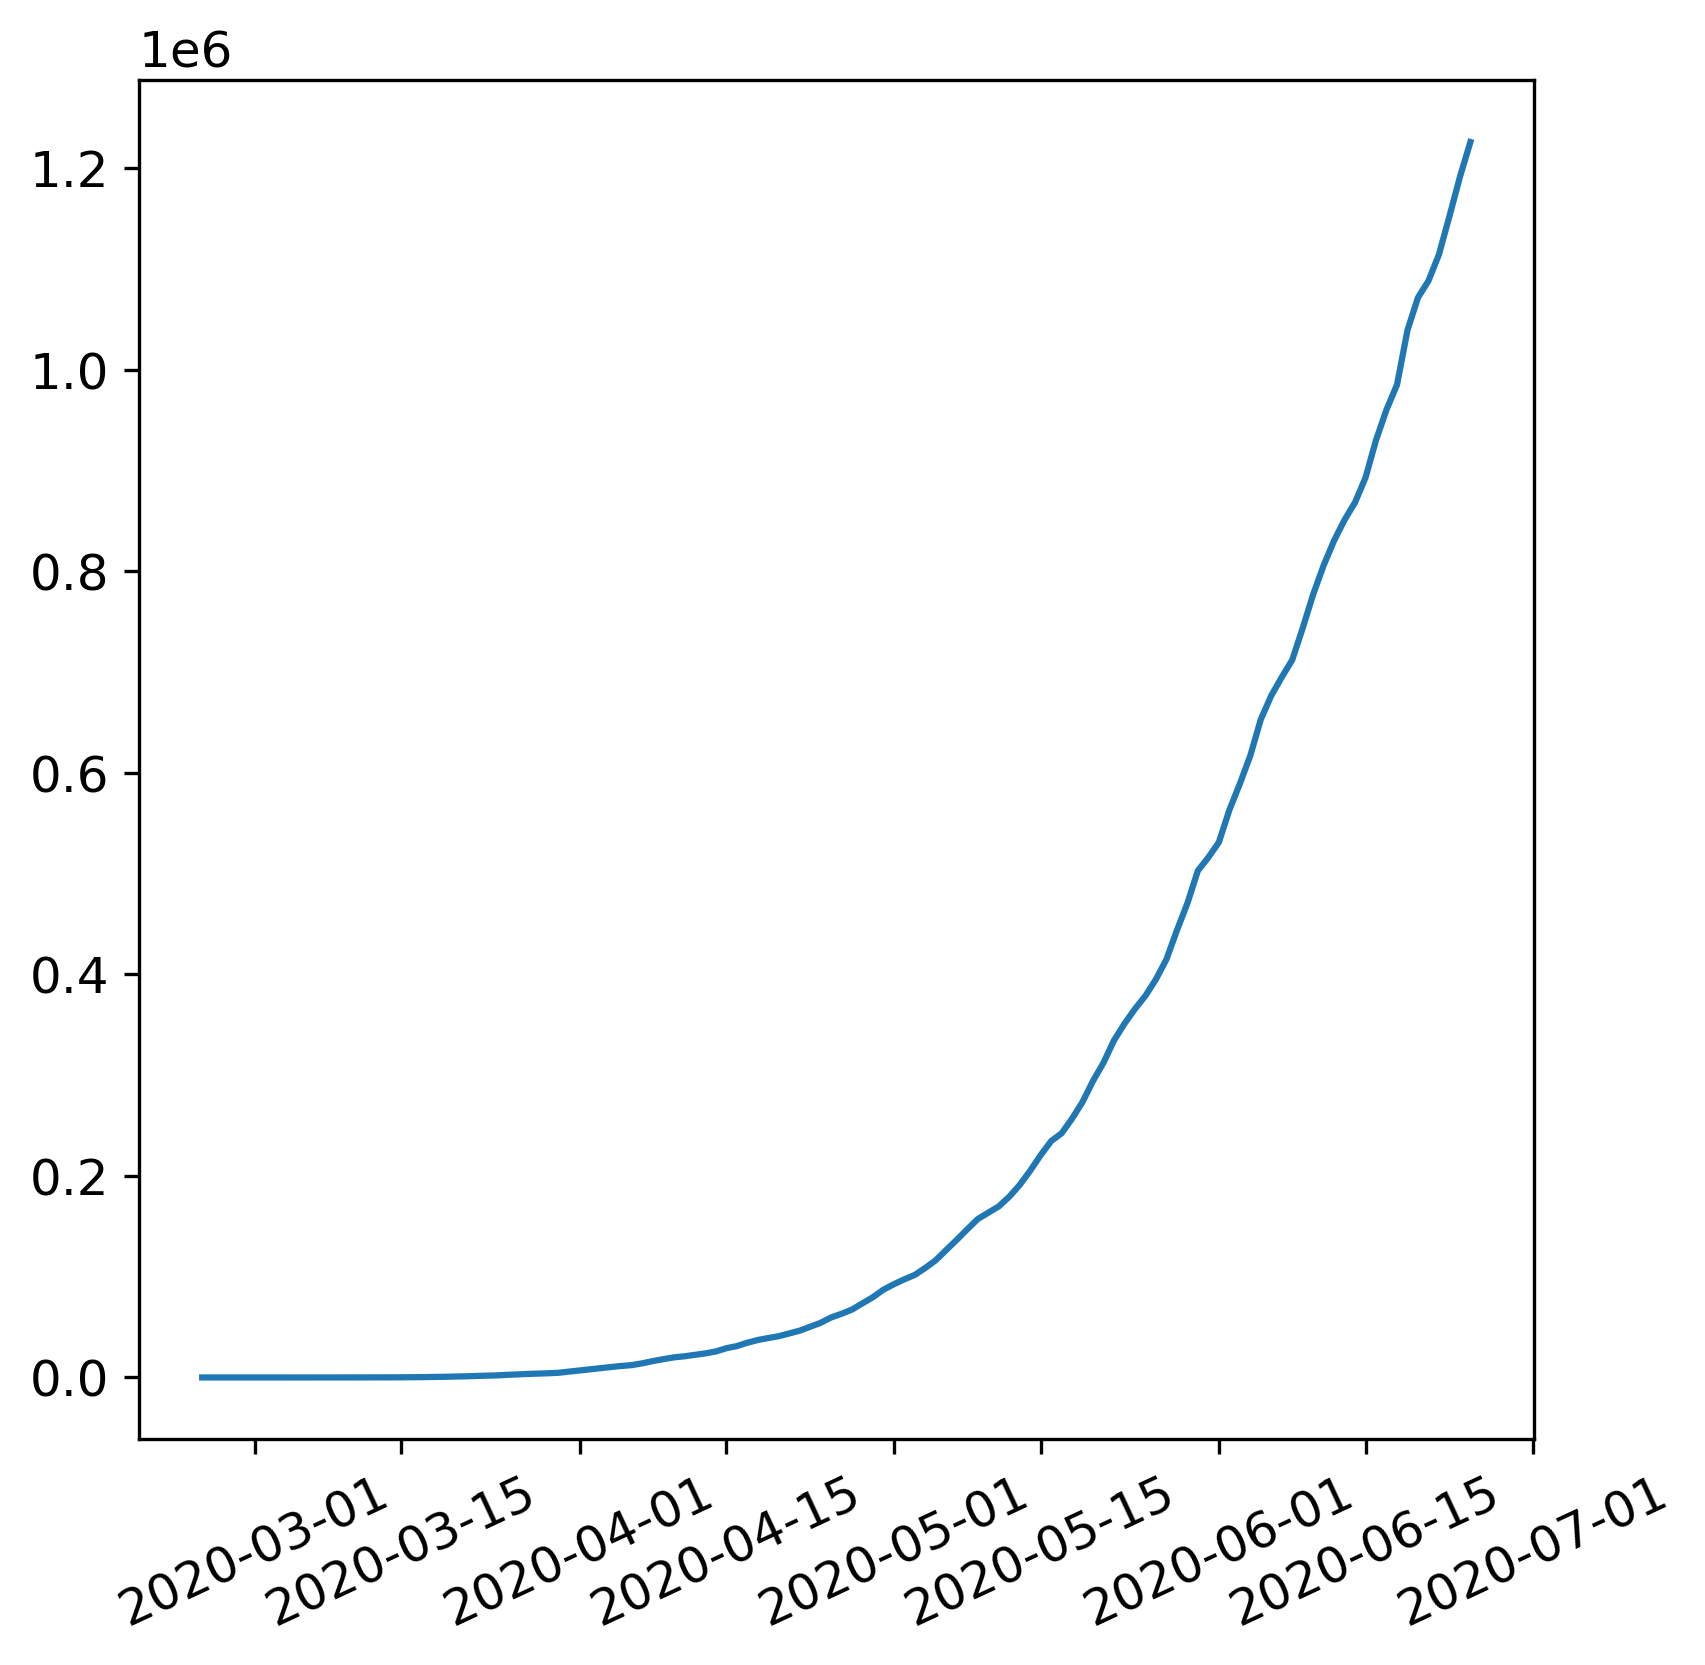

In [23]:
size_fig = (6,6)
plt.figure(figsize=size_fig)
plt.plot(df)
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

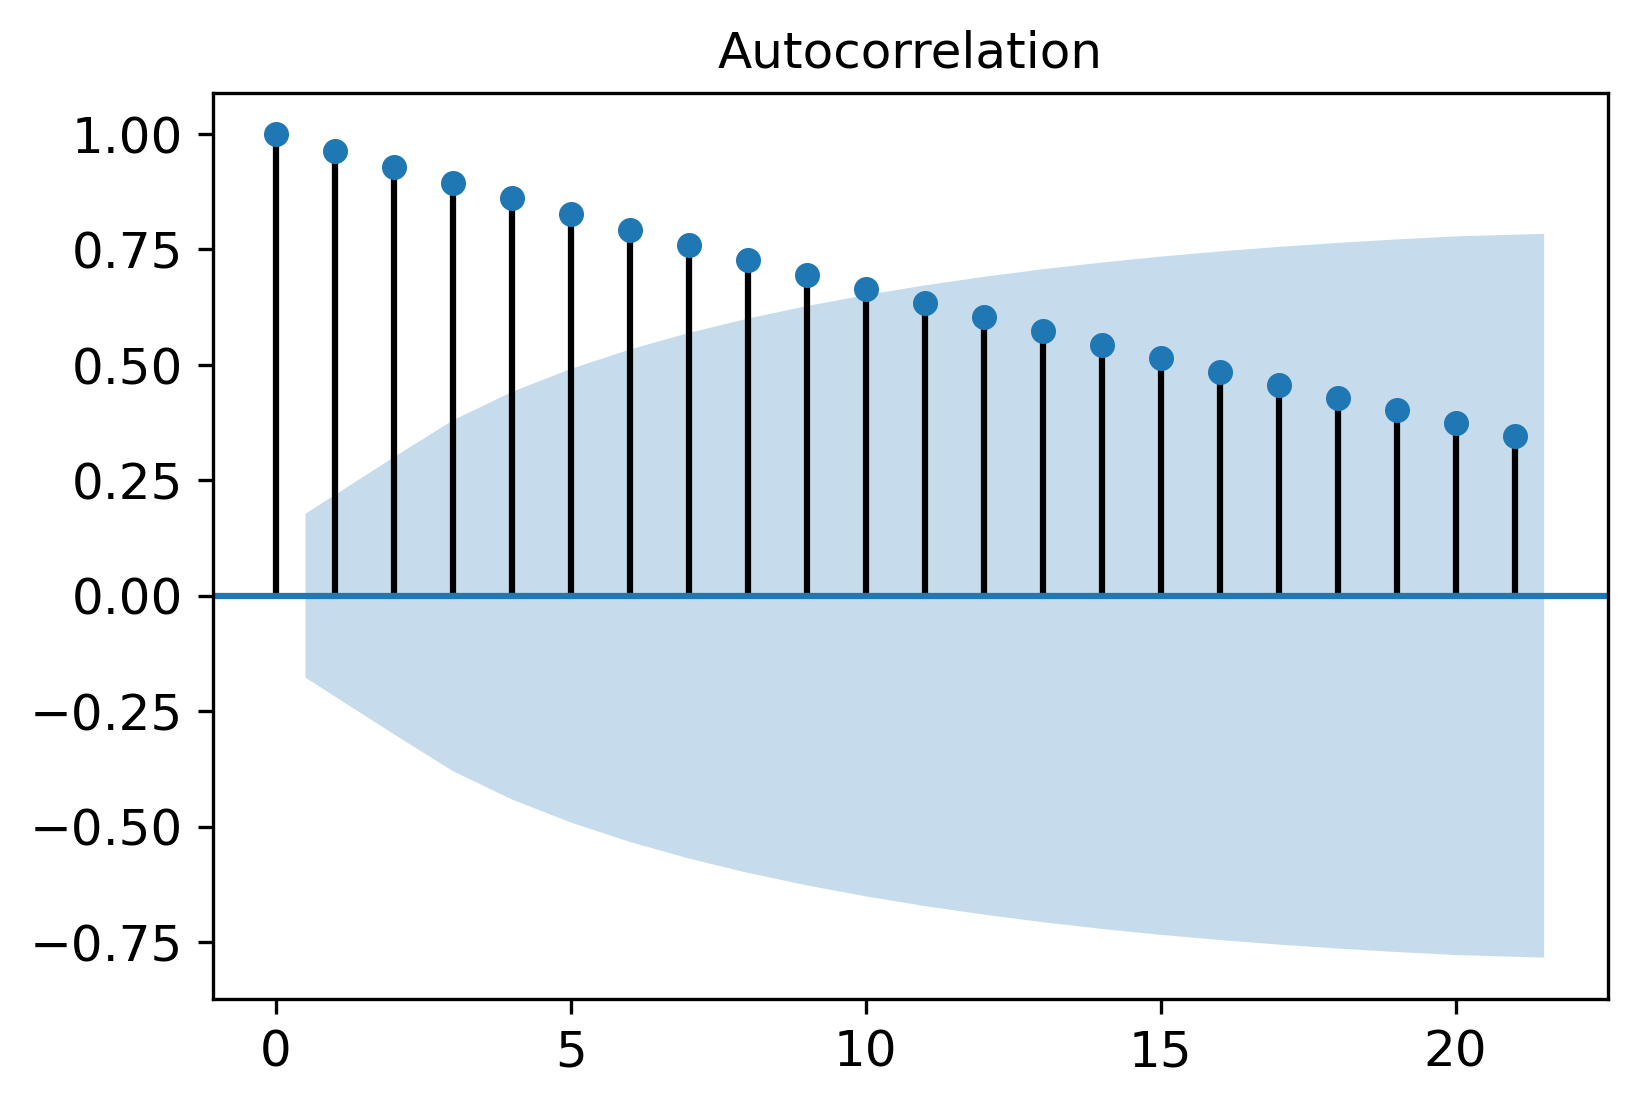

In [24]:
plt.figure(figsize=size_fig)
plot_acf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

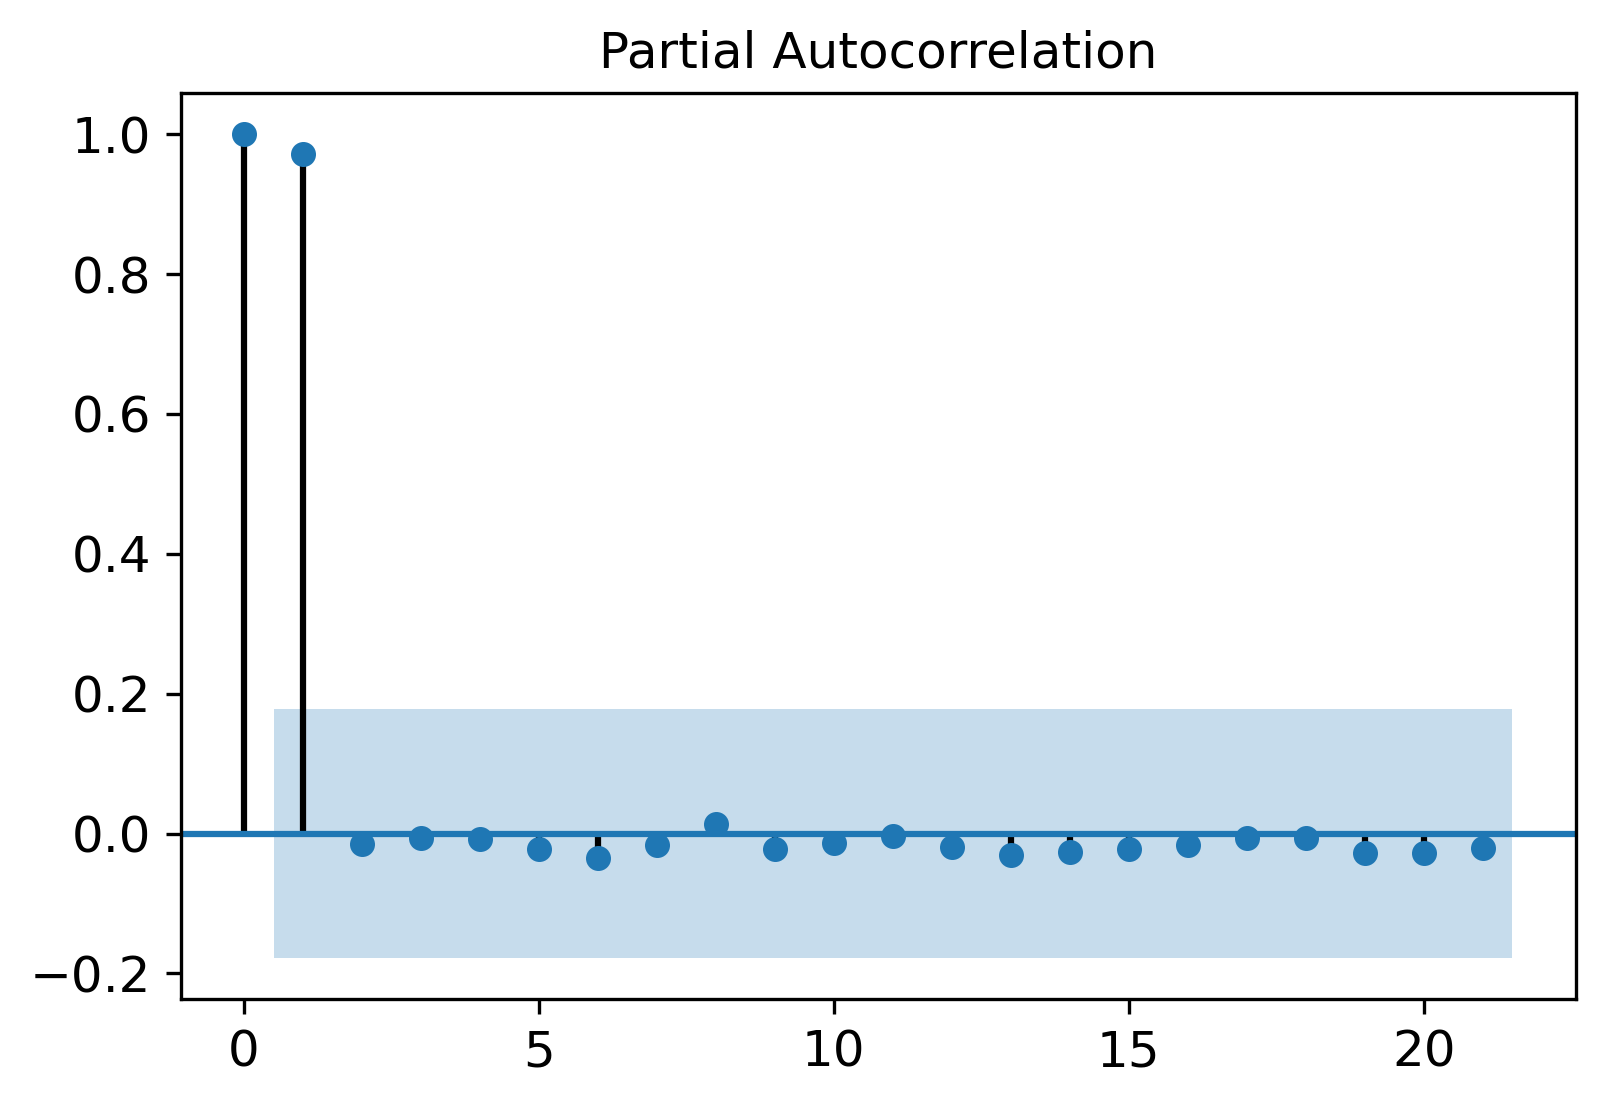

In [25]:
plt.figure(figsize=size_fig)
plot_pacf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

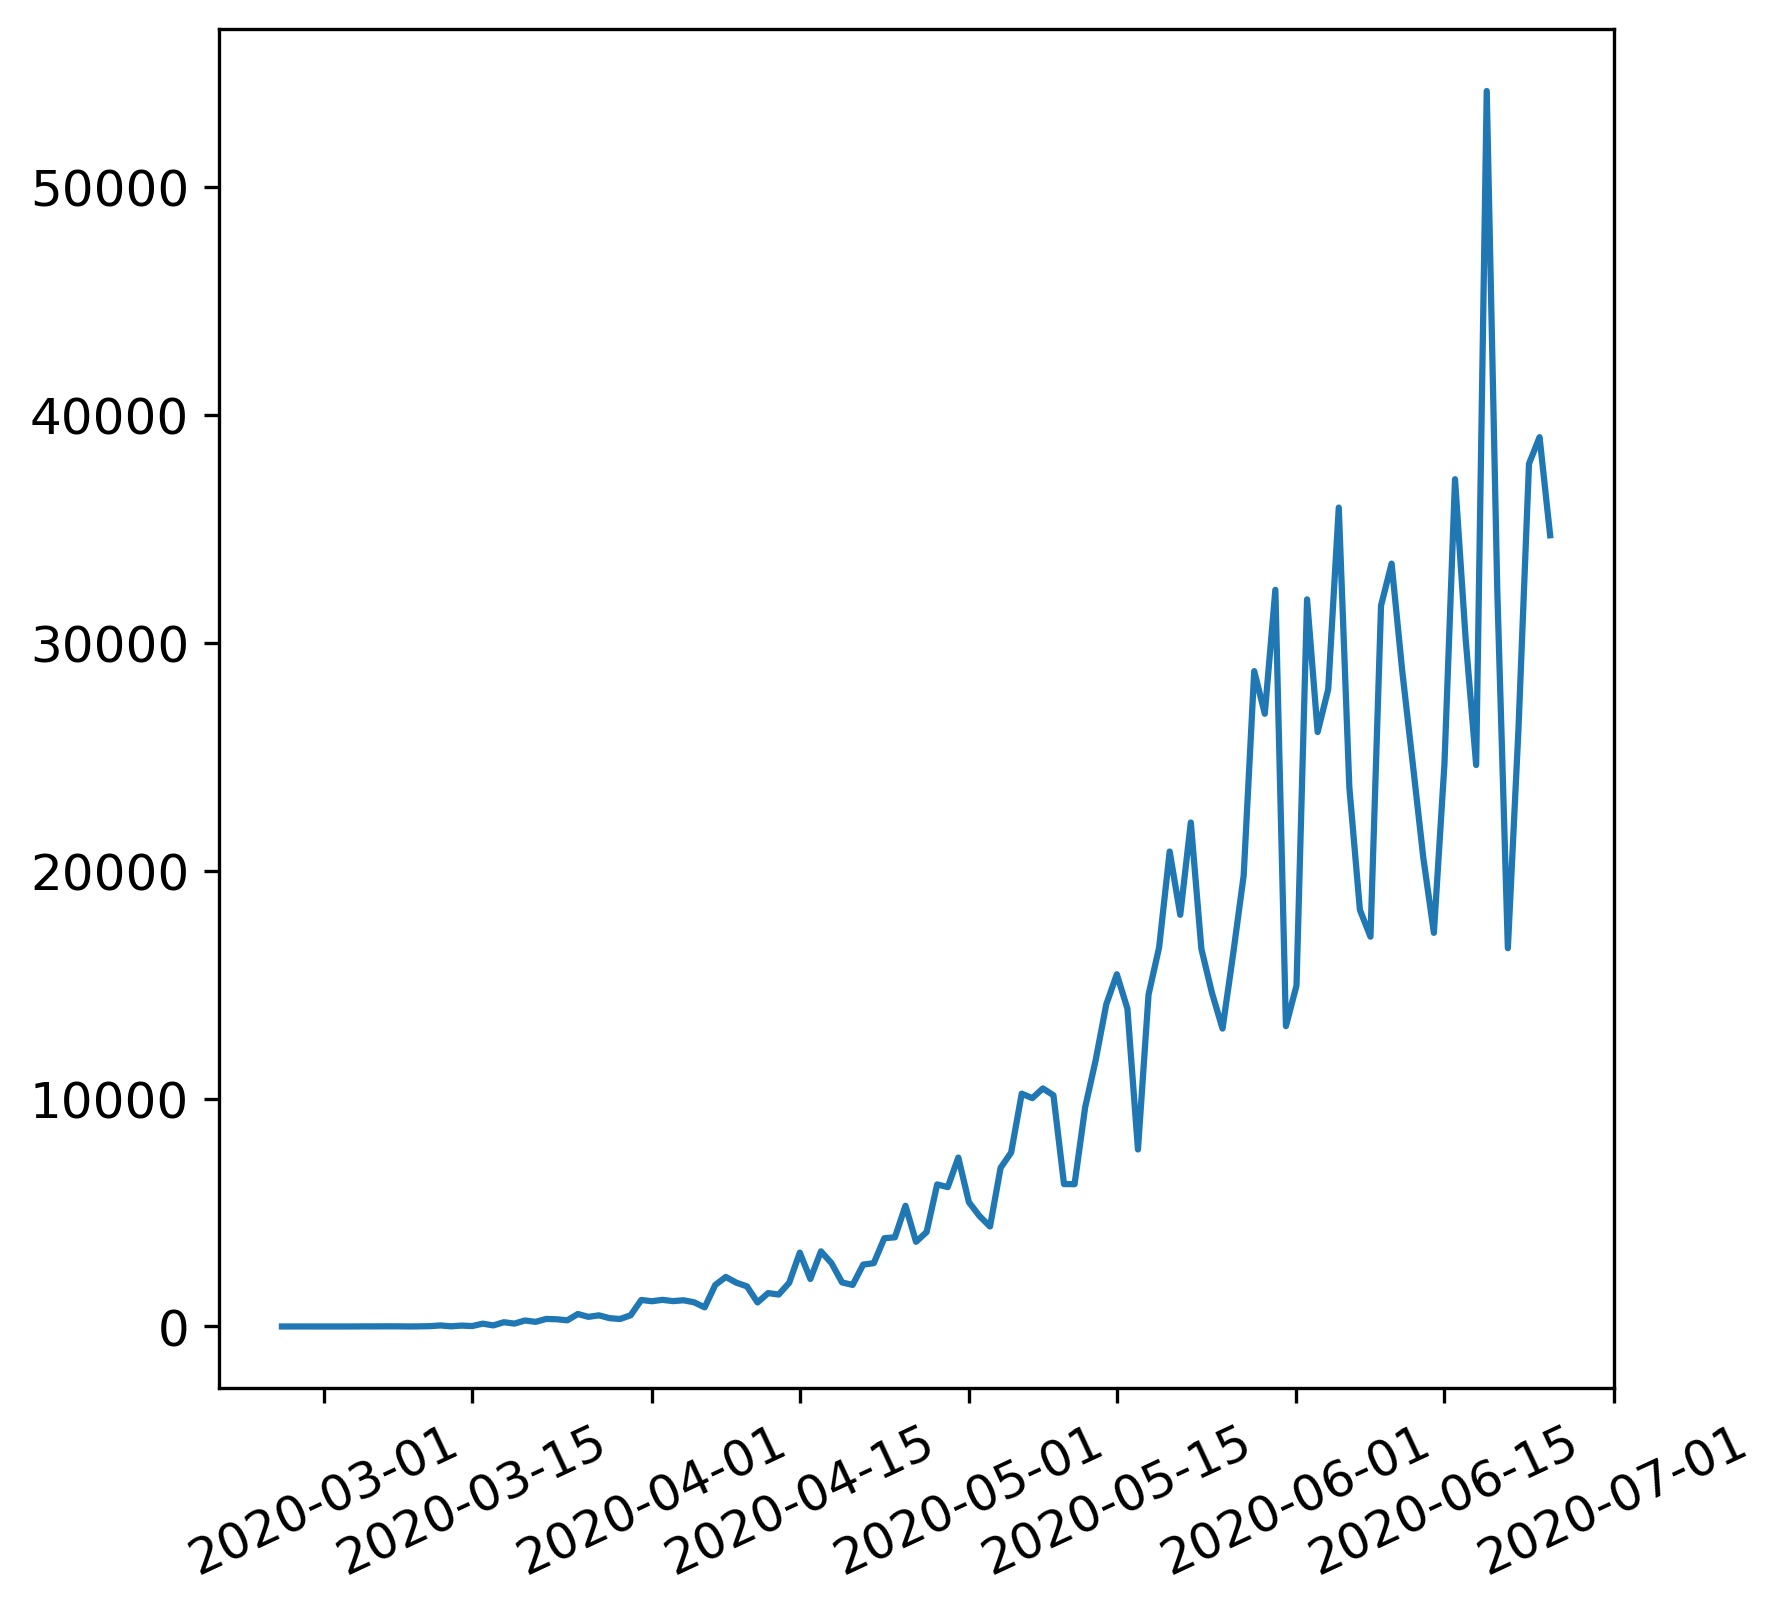

In [26]:
plt.figure(figsize=size_fig)
plt.plot(df.diff().dropna())
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

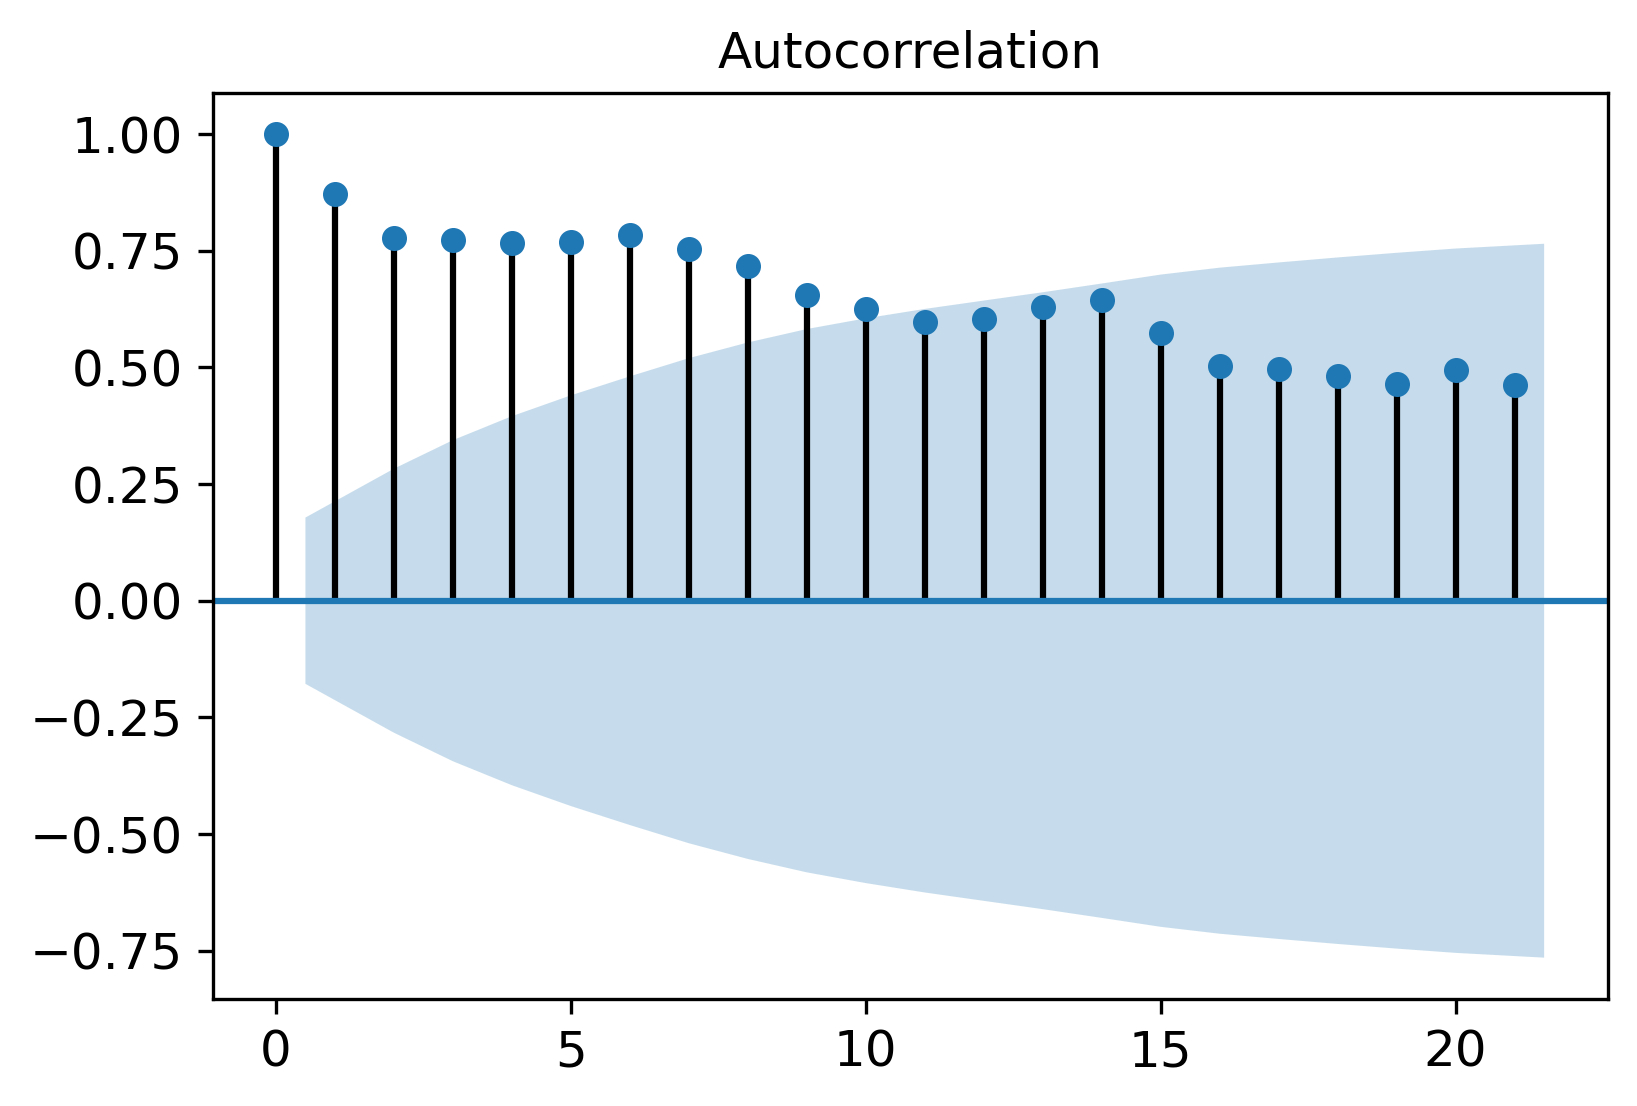

In [27]:
plt.figure(figsize=size_fig)
plot_acf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

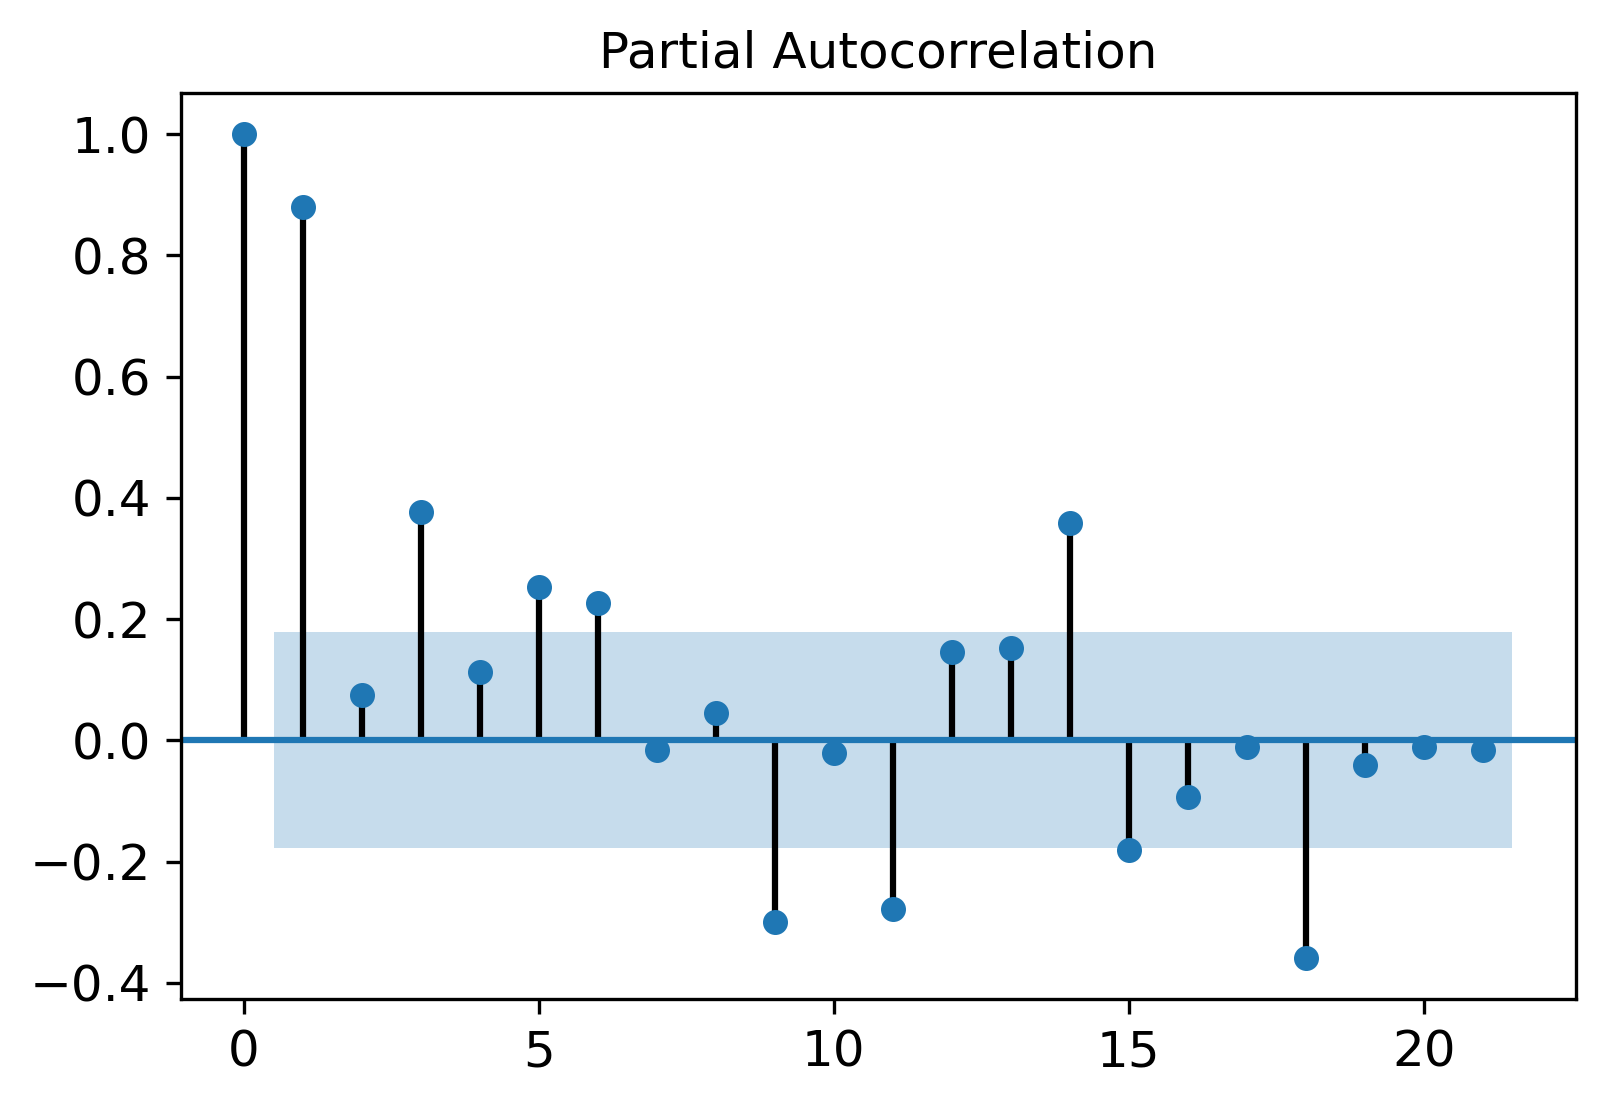

In [28]:
plt.figure(figsize=size_fig)
plot_pacf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

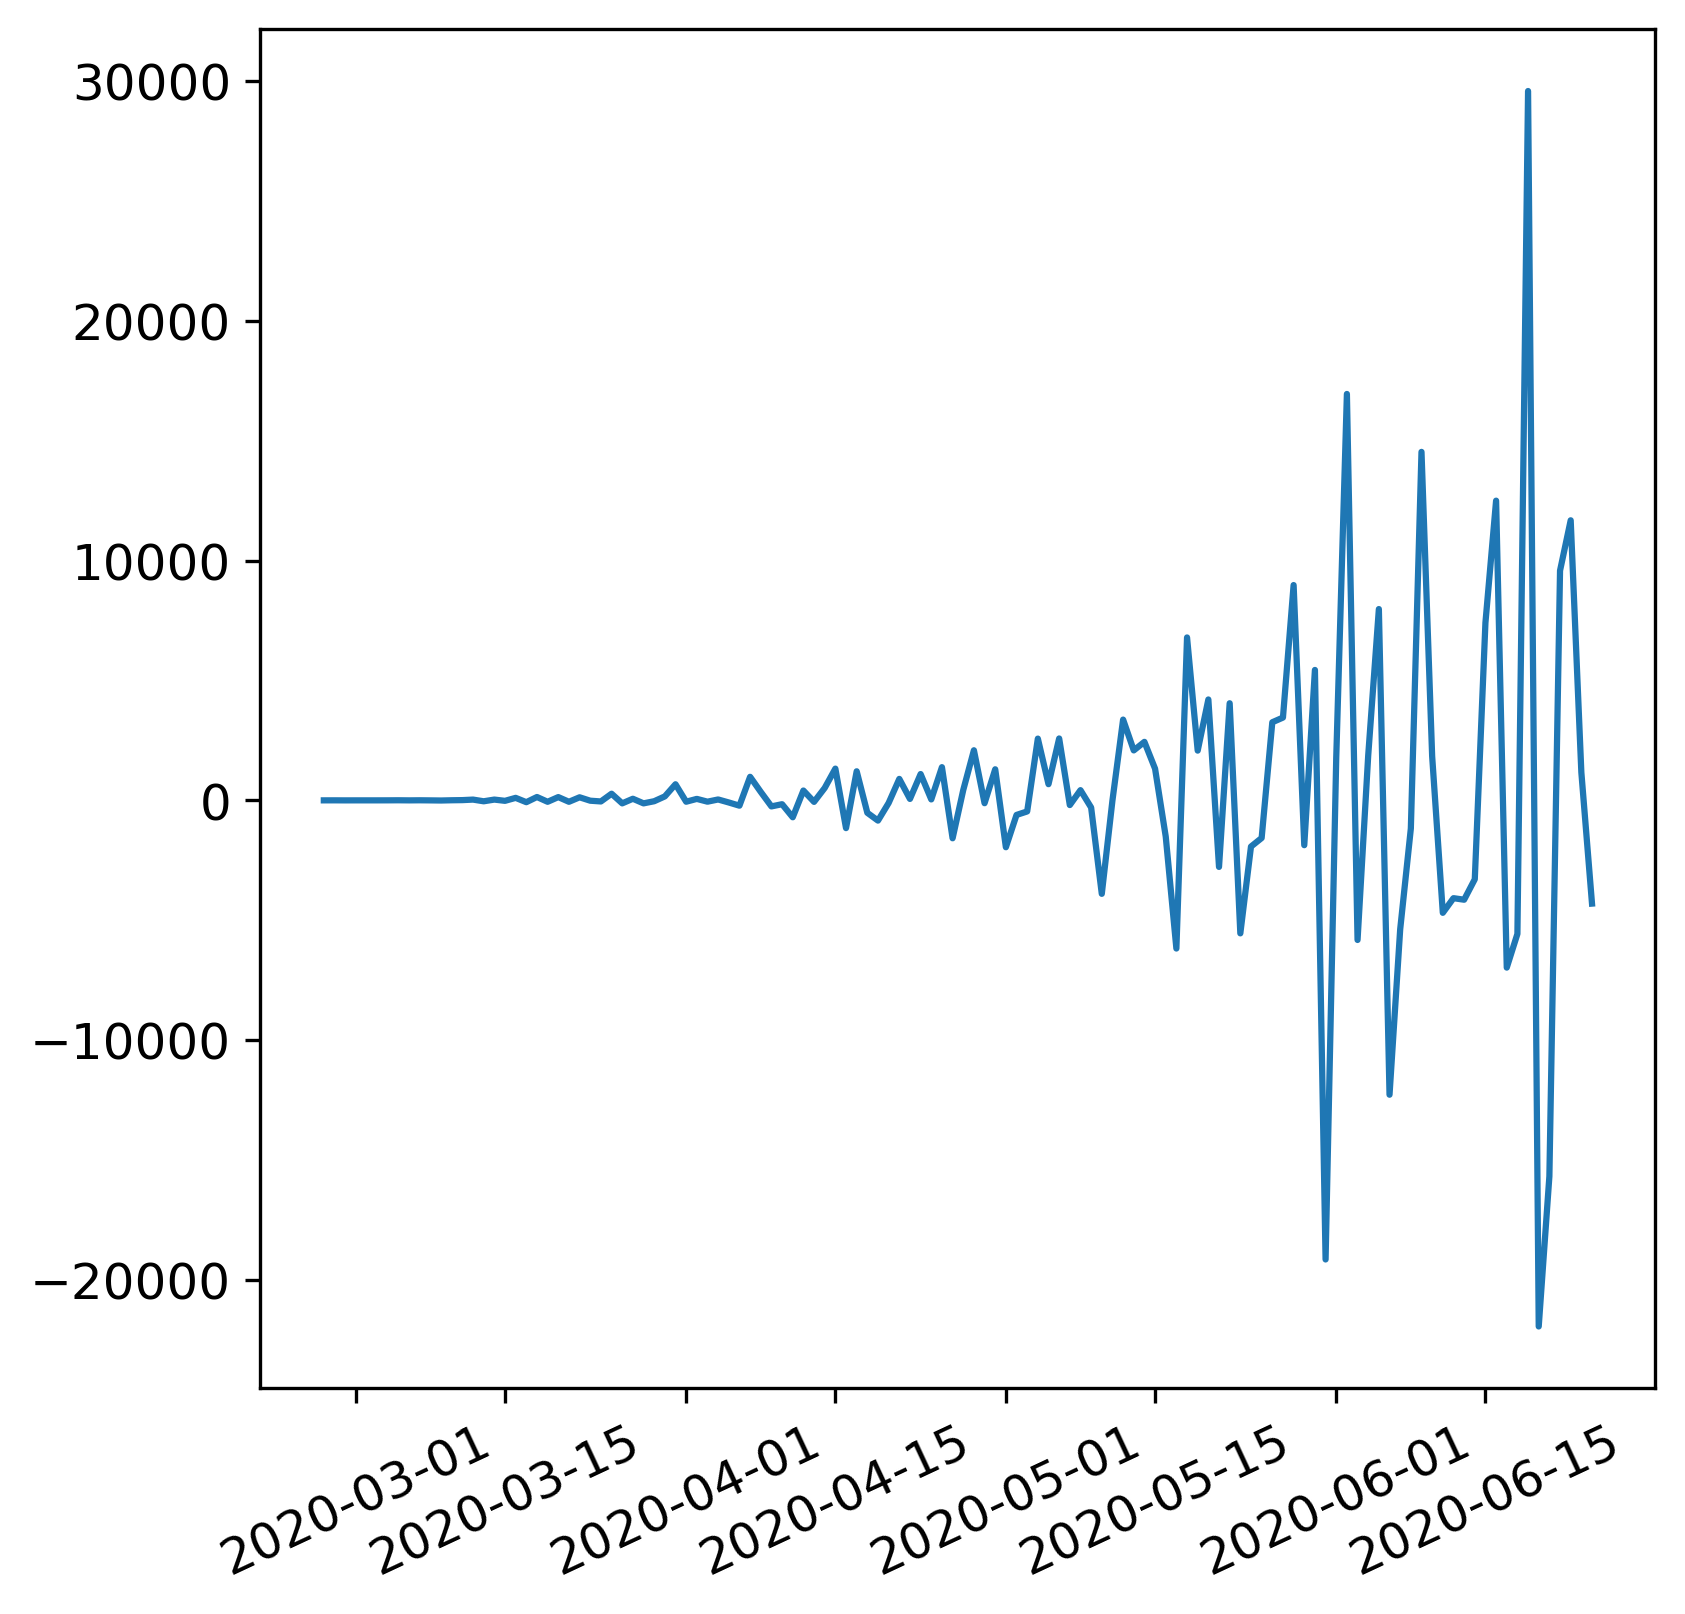

In [29]:
plt.figure(figsize=size_fig)
plt.plot(df.diff().diff().dropna())
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

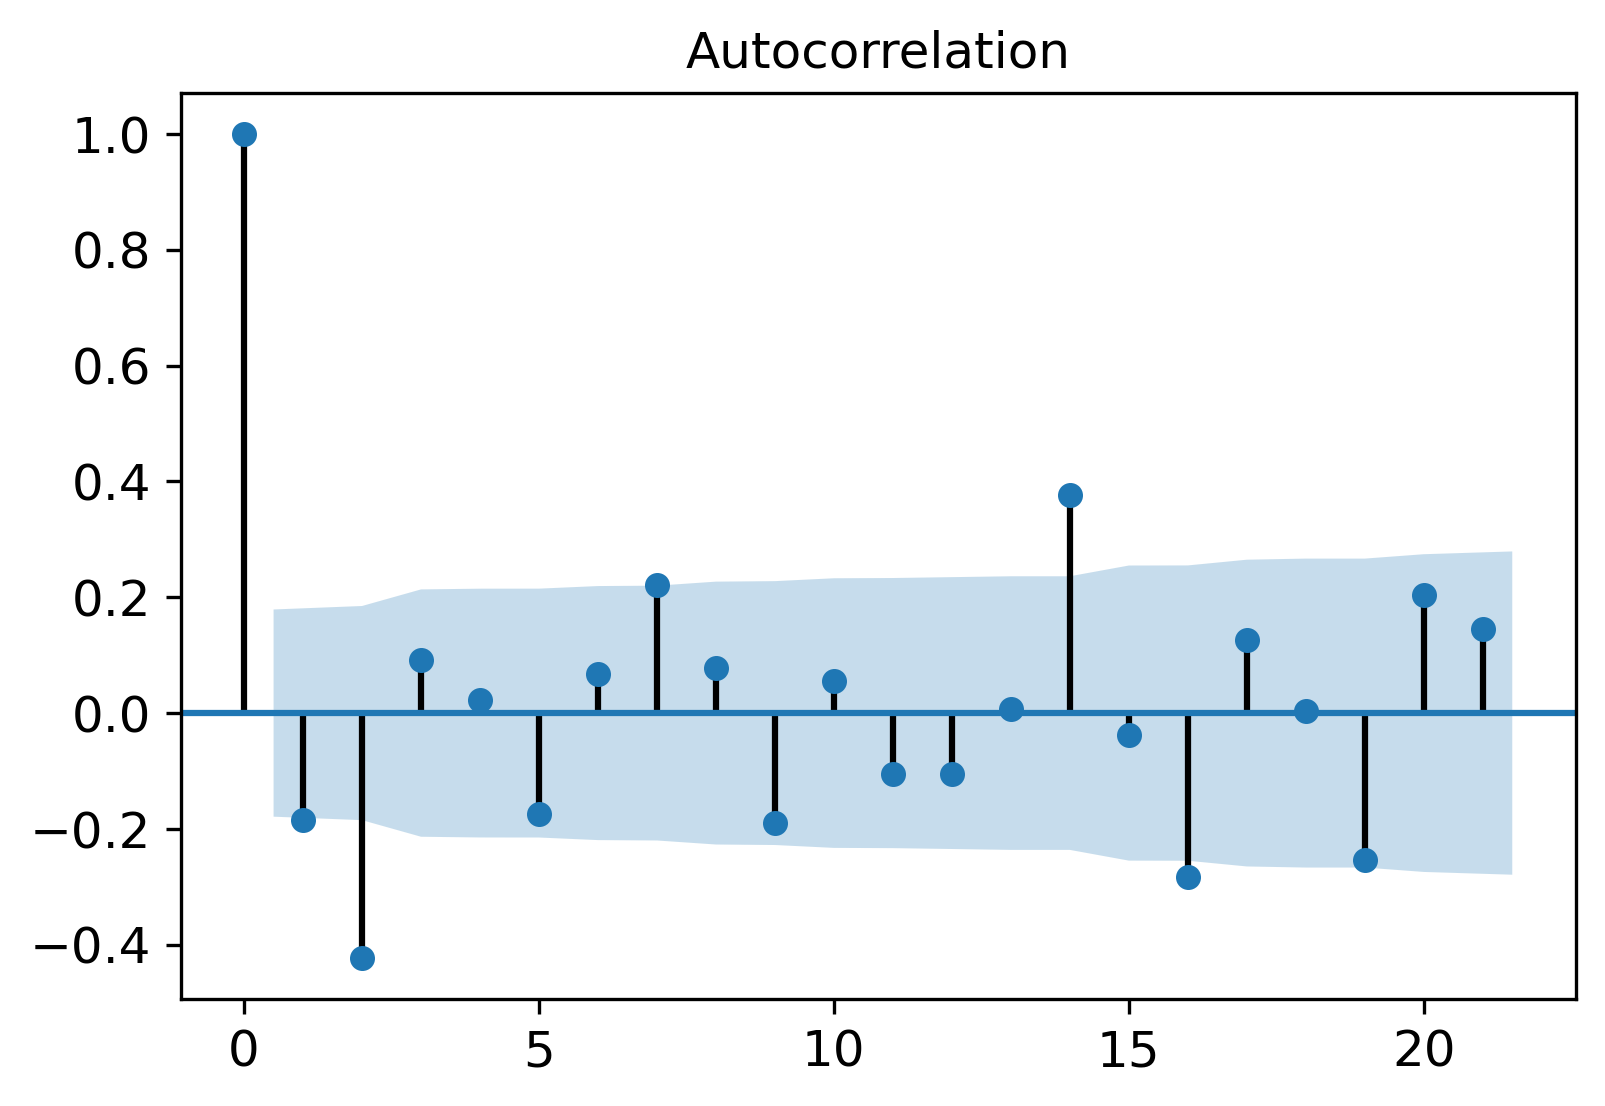

In [30]:
plt.figure(figsize=size_fig)
plot_acf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

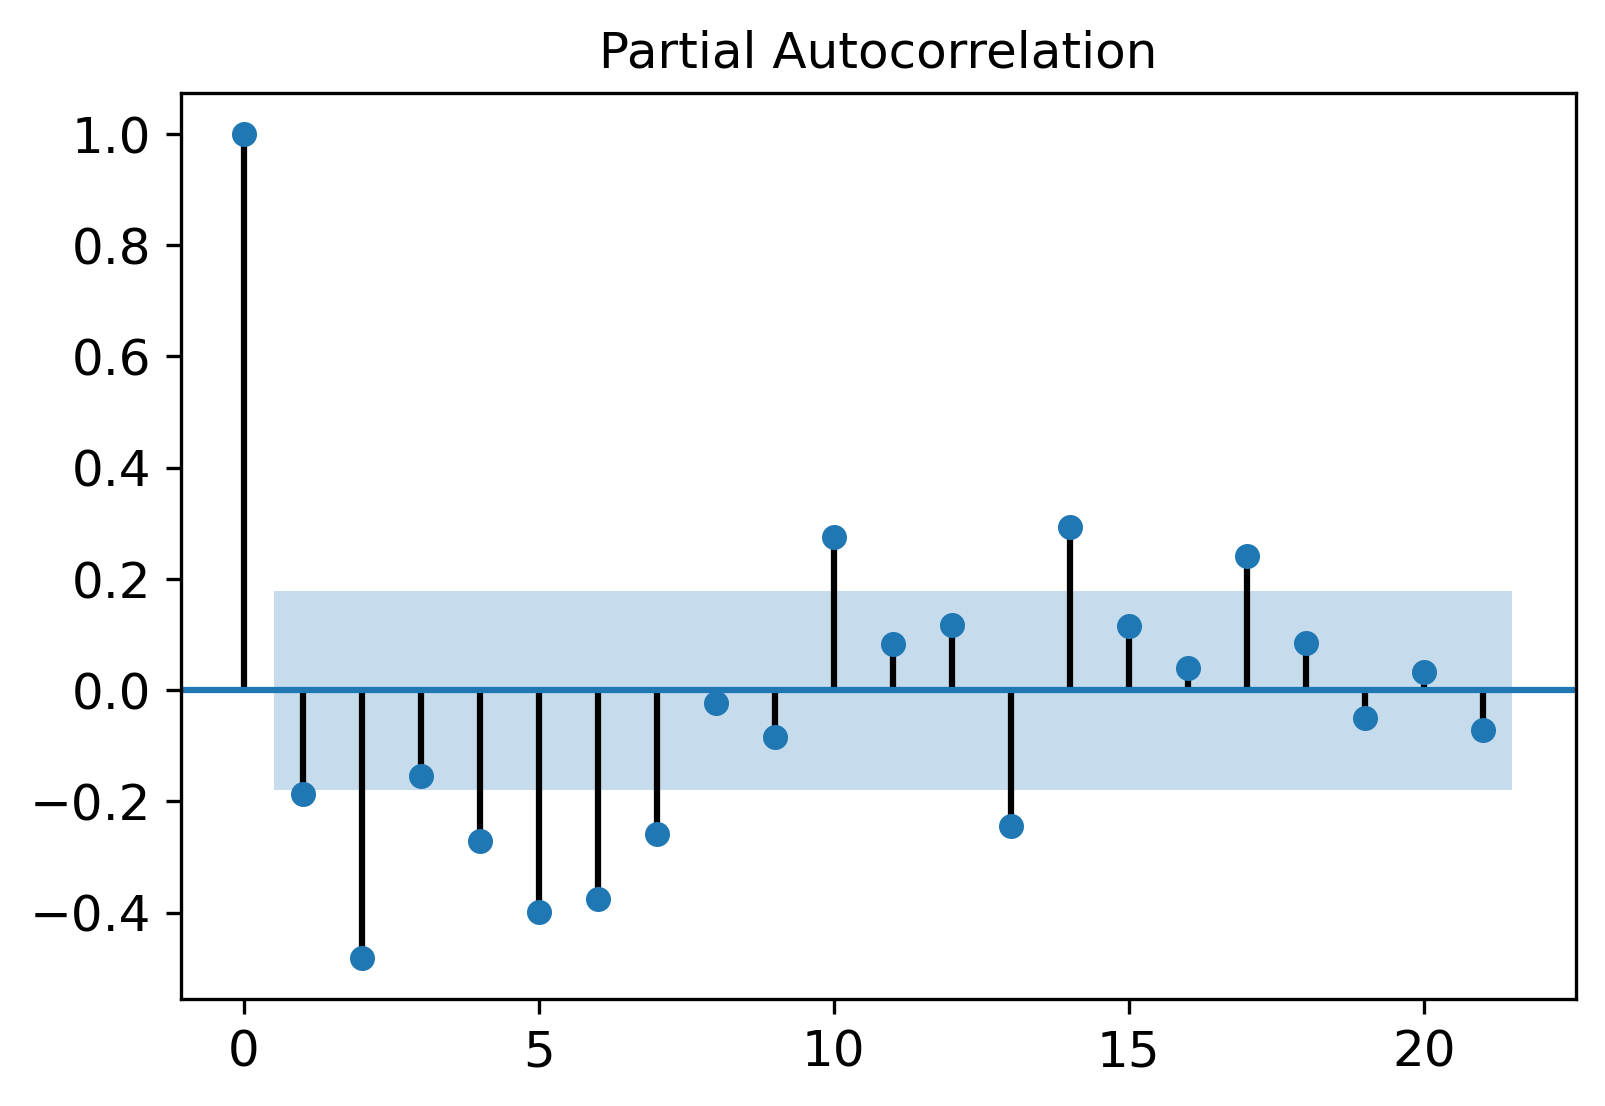

In [31]:
plt.figure(figsize=size_fig)
plot_pacf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

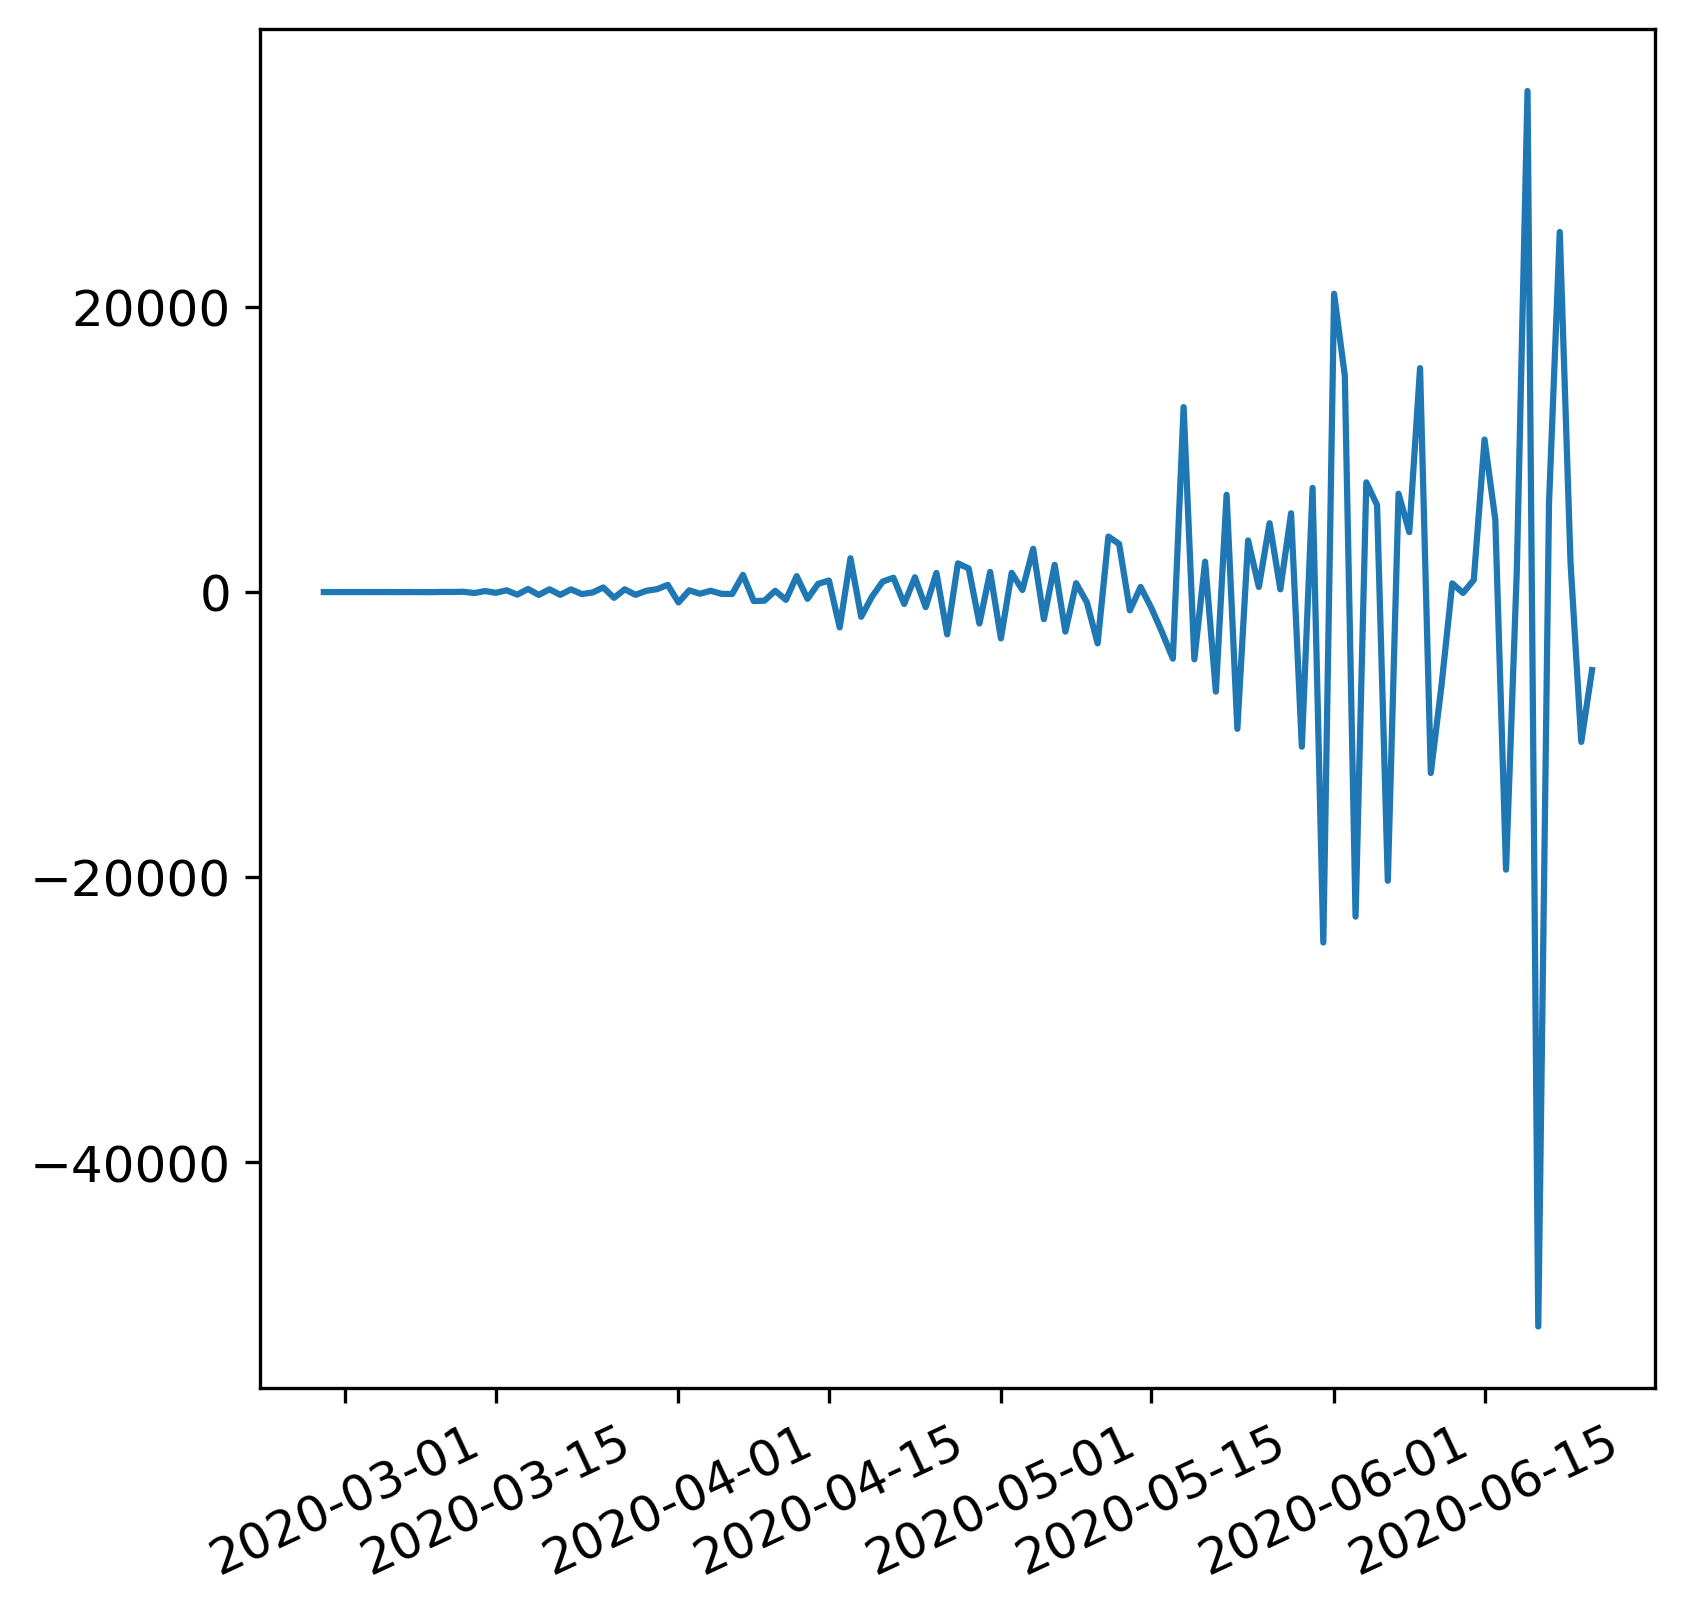

In [32]:
plt.figure(figsize=size_fig)
plt.plot(df.diff().diff().diff().dropna())
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

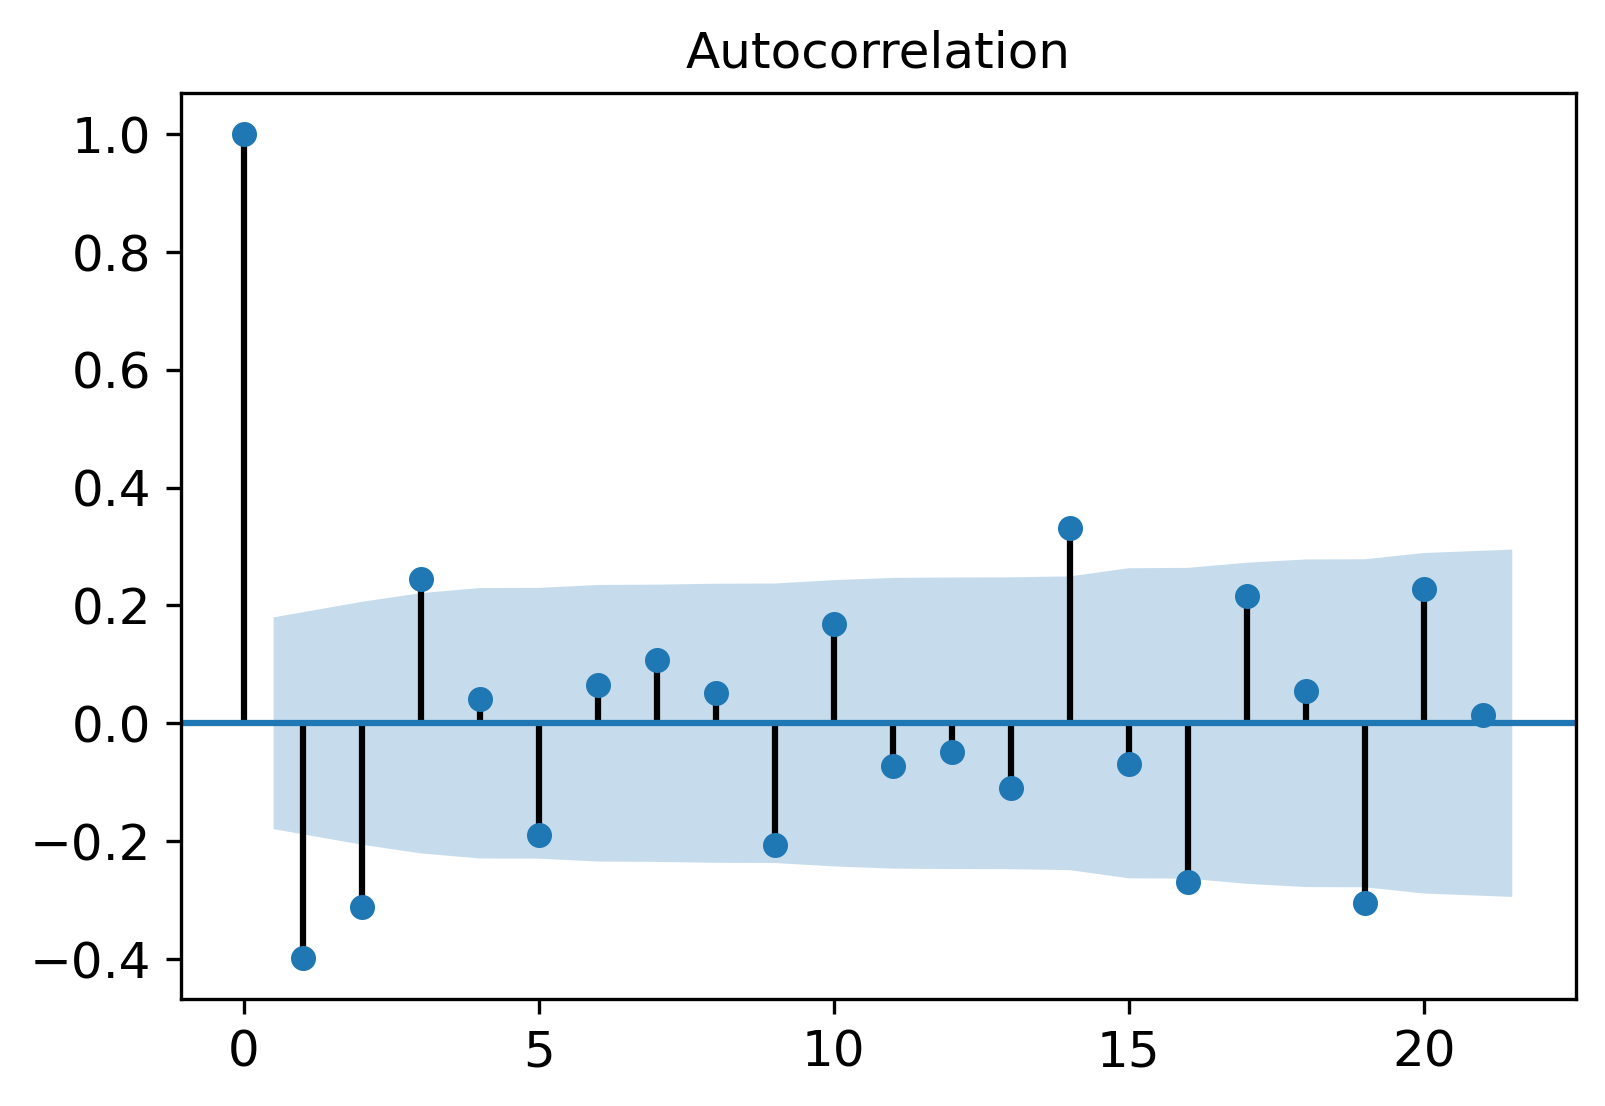

In [33]:
plt.figure(figsize=size_fig)
plot_acf(df.diff().diff().diff().dropna())
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 1800x1800 with 0 Axes>

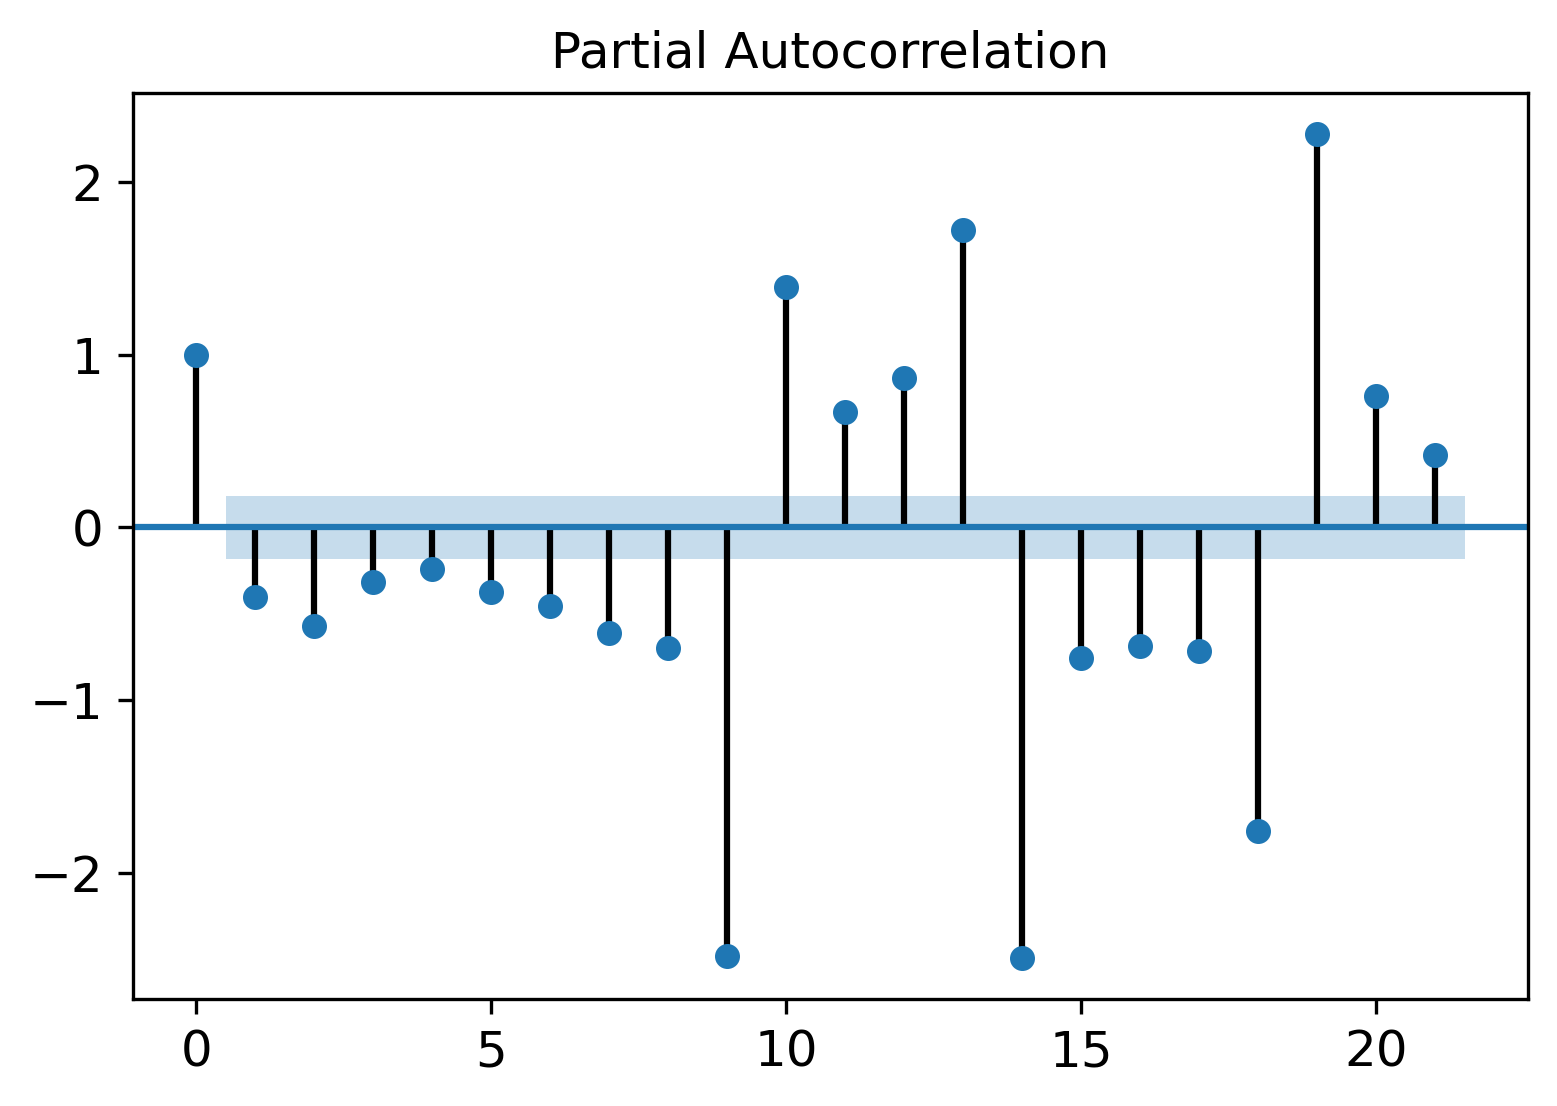

In [34]:
plt.figure(figsize=size_fig)
plot_pacf(df.diff().diff().diff().dropna())
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [35]:
fonte = 20
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

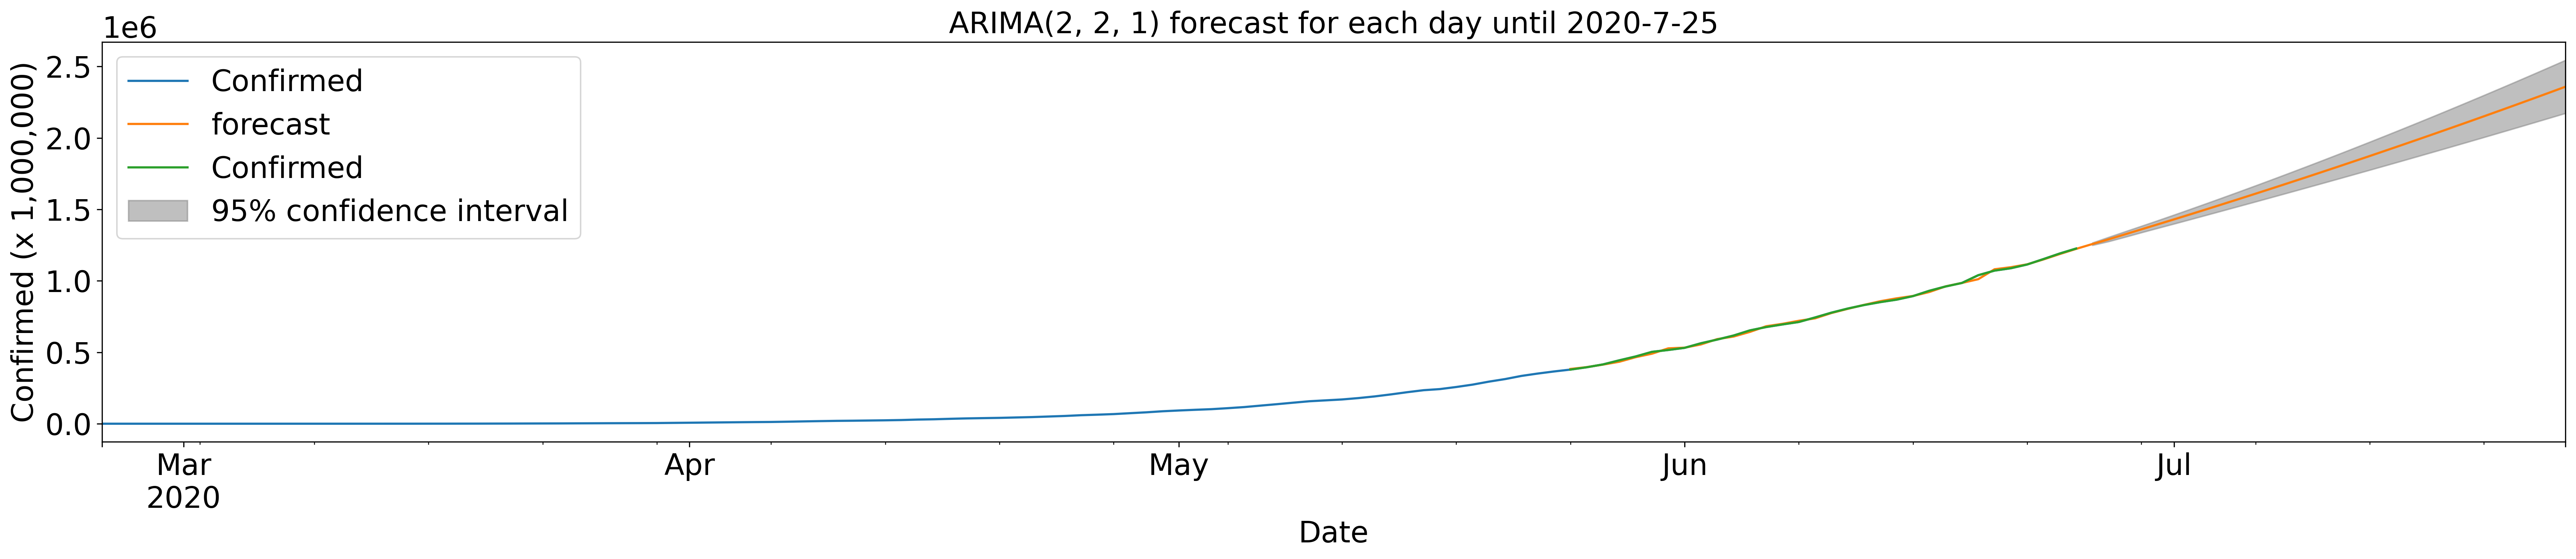

In [36]:
p = 2
d = 2
q = 1
test = (p,d,q) #paramentros guardados em uma variável
modelo = ARIMA(df[campo], order=test, freq='D') #parametros para o modelo preditivo
results = modelo.fit() #ajuste de modelo
plt.figure(figsize=figsize) #plotando imagem
results.plot_predict(
   first, last,               #plotando a primeira e ultima data?
    ax = df[campo].plot(), #filtrando e usando apenas a coluna 'confirmed'
    plot_insample=True,
)
plt.ylabel(campo + ' (x 1,000,000)')
plt.title('ARIMA'+str(test)+' forecast for each day until ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                  120
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1176.550
Method:                       css-mle   S.D. of innovations           4358.014
Date:                Sat, 27 Jun 2020   AIC                           2363.100
Time:                        16:06:27   BIC                           2377.038
Sample:                    02-27-2020   HQIC                          2368.760
                         - 06-25-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                288.0421     76.103      3.785      0.000     138.884     437.201
ar.L1.D2.Confirmed     0.2319      0.092      2.532      0.011       0.052       0.412
ar.L2.D2.Confirmed    -0.3773      0.088     -4.294      0.000      -0.550      -0.205
ma.L1.D2.Confirmed    -0.7887      0.052    -15.211      0.000      -0.890      -0.687
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3074           -1.5987j            1.6280           -0.2198
AR.2            0.3074           +1.5987j            1.6280            0.2198
MA.1            1.2679           +0.0000j            1.2679            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

In [39]:
pred = results.forecast(steps=30)
pred_mean = list(pred[0])
pred_min = list(pred[2][:,0])
pred_max = list(pred[2][:,1])
pred_data = pd.DataFrame()
pred_data['Predicted'] = pred_mean
pred_data['Max'] = pred_max
pred_data['Min'] = pred_min
pred_data.to_csv('pred_data.csv')
pred_data.tail(1)

,Predicted,Max,Min
29,2.358703e+06,2.544477e+06,2.172930e+06


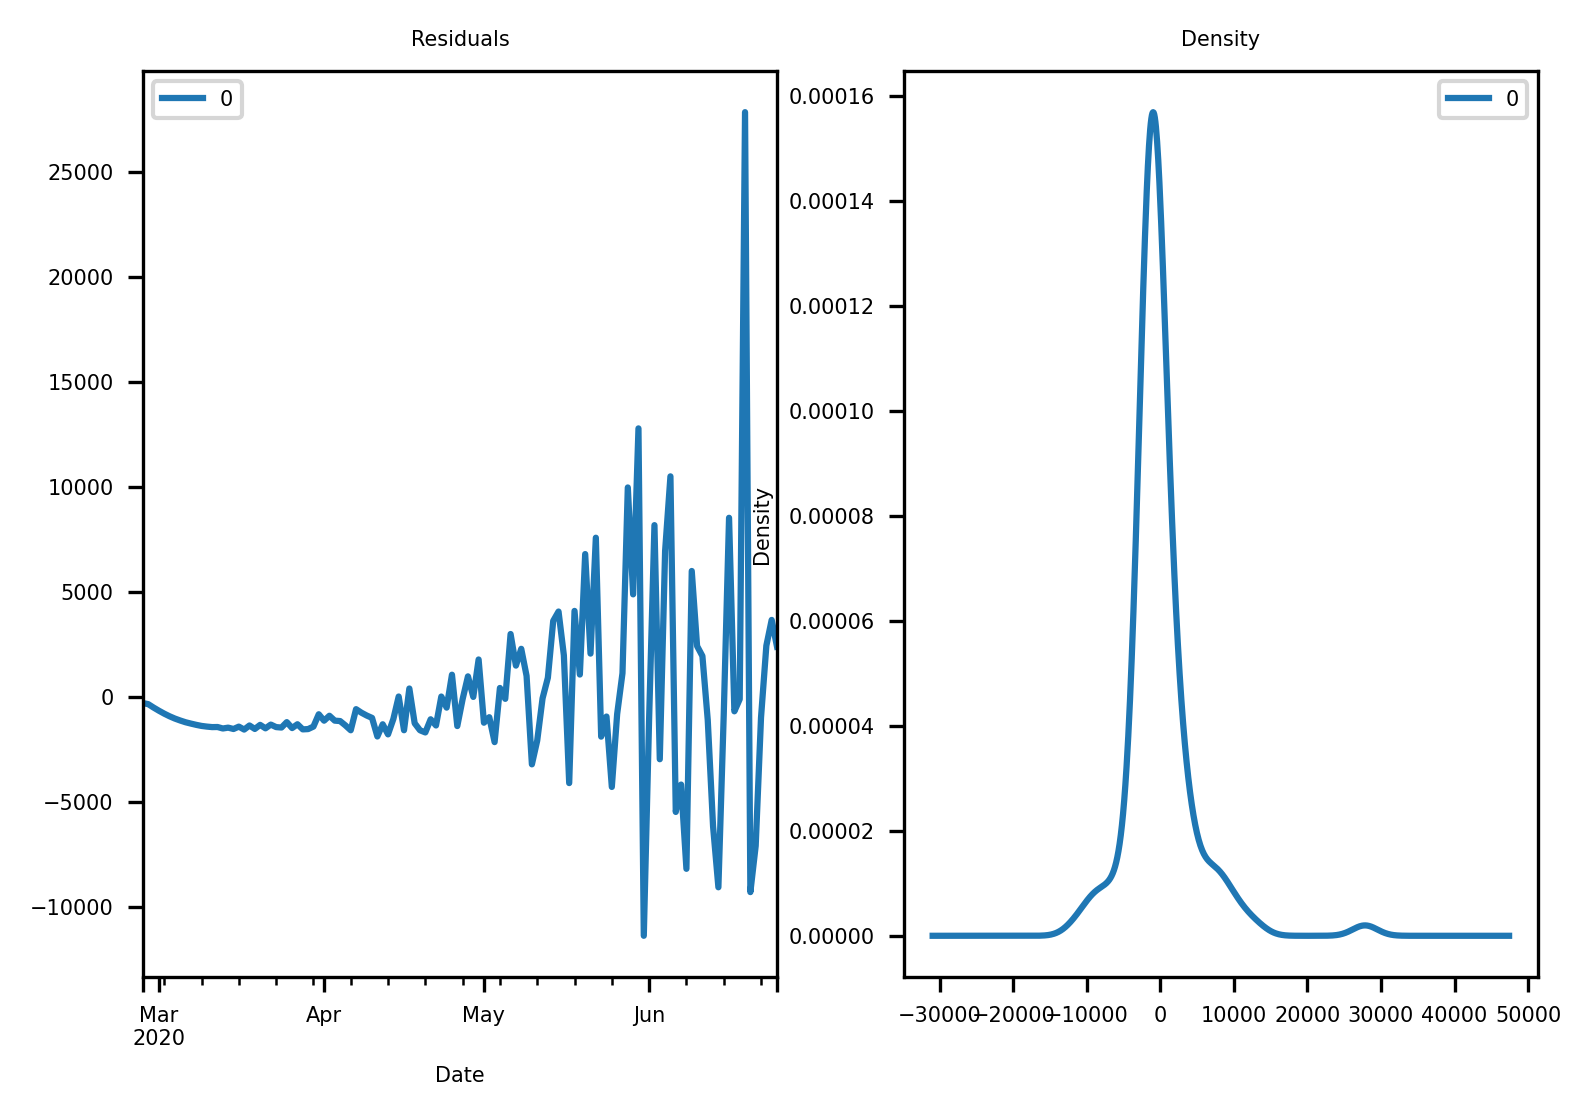

<Figure size 300x600 with 0 Axes>

In [40]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2, )
plt.figure(figsize=(1,2))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [41]:
fonte = 8
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

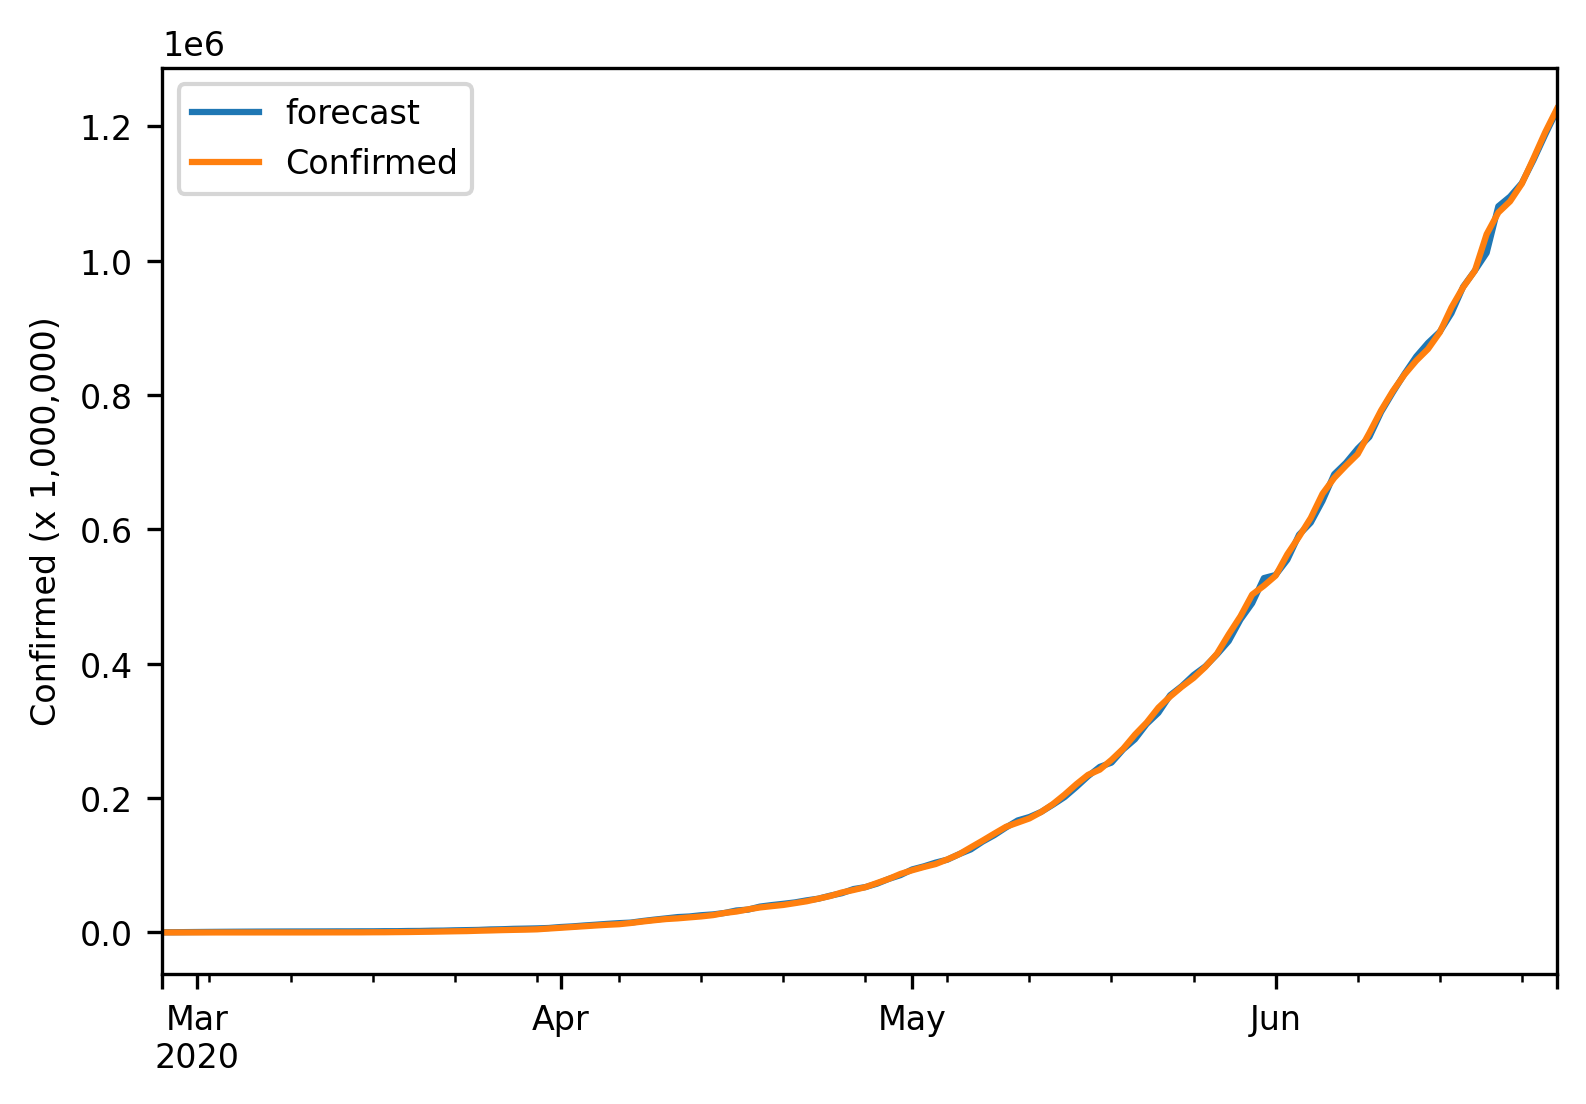

In [42]:
results.plot_predict(dynamic=False)
plt.ylabel(campo + ' (x 1,000,000)')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [43]:
fc, se, conf = results.forecast(79, alpha=0.05)
fc

array([1257714.3421038 , 1290695.03936868, 1325428.42989686,
       1360423.09972301, 1395146.97410358, 1430039.3665456 ,
       1465402.93355022, 1501142.11798362, 1537120.5595977 ,
       1573342.68454237, 1609860.96977413, 1646685.91725149,
       1683800.16272857, 1721195.71606806, 1758877.27569542,
       1796848.94617957, 1835109.90680184, 1873658.41849528,
       1912494.38755117, 1951618.44840409, 1991030.78356813,
       2030731.19599774, 2070719.57112364, 2110995.95671915,
       2151560.40709357, 2192412.91681849, 2233553.46414326,
       2274982.04607102, 2316698.67011345, 2358703.3391436 ,
       2400996.05099365, 2443576.80407673, 2486445.59884271,
       2529602.43599469, 2573047.315526  , 2616780.23716981,
       2660801.20086676, 2705110.20670373, 2749707.2547233 ,
       2794592.34490254, 2839765.47722008, 2885226.65167962,
       2930975.86829006, 2977013.12705209, 3023338.4279625 ,
       3069951.77102029, 3116853.15622644, 3164042.58358154,
       3211520.05308539,

In [44]:
# from statsmodels.tsa.stattools import acf

In [45]:
'''
model = pm.auto_arima(df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
'''

"\nmodel = pm.auto_arima(df, start_p=0, start_q=0,\n                      test='adf',       # use adftest to find optimal 'd'\n                      max_p=3, max_q=3, # maximum p and q\n                      m=1,              # frequency of series\n                      d=None,           # let model determine 'd'\n                      seasonal=False,   # No Seasonality\n                      start_P=0, \n                      D=0, \n                      trace=True,\n                      error_action='ignore',  \n                      suppress_warnings=True, \n                      stepwise=True)\n\nprint(model.summary())\n"

In [46]:
'''
smodel = pm.auto_arima(df, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=30,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()
'''

"\nsmodel = pm.auto_arima(df, start_p=0, start_q=0,\n                         test='adf',\n                         max_p=3, max_q=3, m=30,\n                         start_P=0, seasonal=True,\n                         d=None, D=1, trace=True,\n                         error_action='ignore',  \n                         suppress_warnings=True, \n                         stepwise=True)\n\nsmodel.summary()\n"

In [47]:
'''
sxmodel = pm.auto_arima(df, 
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()
'''

"\nsxmodel = pm.auto_arima(df, \n                           start_p=0, start_q=0,\n                           test='adf',\n                           max_p=3, max_q=3, m=30,\n                           start_P=0, seasonal=True,\n                           d=None, D=1, trace=True,\n                           error_action='ignore',  \n                           suppress_warnings=True, \n                           stepwise=True)\n\nsxmodel.summary()\n"

In [48]:
'''
y = df[campo]
param_list_best=(1,2,1)
param_s_list_best=(0,1,0,30)
mod = sm.tsa.statespace.SARIMAX(
                                y,
                                order=param_list_best,
                                seasonal_order=param_s_list_best,
                                enforce_stationarity=False,
                                enforce_invertibility=False
)
results = mod.fit()
results.summary()
'''

'\ny = df[campo]\nparam_list_best=(1,2,1)\nparam_s_list_best=(0,1,0,30)\nmod = sm.tsa.statespace.SARIMAX(\n                                y,\n                                order=param_list_best,\n                                seasonal_order=param_s_list_best,\n                                enforce_stationarity=False,\n                                enforce_invertibility=False\n)\nresults = mod.fit()\nresults.summary()\n'

In [49]:
'''
fonte = 15
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)
'''

"\nfonte = 15\nparams = {\n        'font.size': fonte,\n        'legend.fontsize': fonte,\n        'axes.labelsize': fonte,\n        'axes.titlesize': fonte,\n        'xtick.labelsize': fonte,\n        'ytick.labelsize': fonte,\n        'figure.dpi':300\n}\nplt.rcParams.update(params)\n"

In [50]:
'''
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=figsize)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(campo + ' (x 1,000,000)')
upper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)
lower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)
plt.text(x='2020-02-26', y=lower-300000, s=
    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+
    'Forecast: ' + str(round(((upper - lower)/2 + lower)/1000000, 2)) + ' M\n'+
    'Lower: ' + str(round(lower/1000000, 2)) + ' M'
)
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')
'''

"\npred_uc = results.get_forecast(steps=30)\npred_ci = pred_uc.conf_int()\nax = y.plot(label='Observed', figsize=figsize)\npred_uc.predicted_mean.plot(ax=ax, label='Forecast')\nax.fill_between(pred_ci.index,\n                pred_ci.iloc[:, 0],\n                pred_ci.iloc[:, 1], color='k', alpha=.25)\nax.set_xlabel('Date')\nax.set_ylabel(campo + ' (x 1,000,000)')\nupper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)\nlower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)\nplt.text(x='2020-02-26', y=lower-300000, s=\n    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+\n    'Forecast: ' + str(round(((upper - lower)/2 + lower)/1000000, 2)) + ' M\n'+\n    'Lower: ' + str(round(lower/1000000, 2)) + ' M'\n)\nplt.legend()\nplt.title('SARIMA model forecast for day to ' + last)\nif print_campo == 's':\n    g += 1\n    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')\n"